# Creación del dataset dsualmh

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 7 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 electric furnace

- 3 microwave

- 4 television

- 5 kettle

- 6 vacuum cleaner

- 7 electric space heater

- 8 electric shower heater

- 9 fan

- 10 fridge

- 11 freezer


Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [2]:
from nilmtk.dataset_converters import convert_ualmt
convert_ualmt('./data/ozm1/', 'dsualmh.h5','2023-06-09','2023-06-10')


output_filename dsualmh.h5 format HDF
Path ualmt: ./data/ozm1/electricity

***********************************************************************************************
..Loading file    1 .csv
Filename  ./data/ozm1/electricity\1.csv
..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.686296e+12  20.0671 -5.03741  20.689735  49.9827  249.569  0.637181   
1      1.686296e+12  19.1541 -4.62669  19.704964  49.9829  249.532  0.626578   
2      1.686296e+12  19.8674 -4.33612  20.335104  49.9835  249.636  0.638109   
3      1.686296e+12  20.0530 -4.49449  20.550546  49.9838  249.561  0.635802   
4      1.686296e+12  19.4303 -4.29724  19.899855  49.9838  249.598  0.627943   
...             ...      ...      ...        ...      ...      ...       ...   
72505  1.686311e+12  18.5006 -3.01735  18.745054  50.0037  245.483  0.568049   
72506  1.686311e+12  18.6316 -3.21547  18.907005  50.0040  245.404  0.566956   
72507  1.686311e+12  18.6

.......Sorting index
physical_quantity                     power                      frequency  \
type                                 active reactive   apparent              
2023-06-09 09:34:38.147000+02:00  20.067101 -5.03741  20.689735  49.982700   
2023-06-09 09:34:38.347000+02:00  19.154100 -4.62669  19.704964  49.982899   
2023-06-09 09:34:38.547000+02:00  19.867399 -4.33612  20.335104  49.983501   
2023-06-09 09:34:38.747000+02:00  20.052999 -4.49449  20.550547  49.983799   
2023-06-09 09:34:38.947000+02:00  19.430300 -4.29724  19.899855  49.983799   
...                                     ...      ...        ...        ...   
2023-06-09 13:36:18.976000+02:00  18.500601 -3.01735  18.745054  50.003700   
2023-06-09 13:36:19.176000+02:00  18.631599 -3.21547  18.907005  50.004002   
2023-06-09 13:36:19.376000+02:00  18.675100 -2.88352  18.896381  50.004200   
2023-06-09 13:36:19.576000+02:00  20.255400 -2.63702  20.426306  50.004200   
2023-06-09 13:36:19.776000+02:00  19.884899

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.53099 -0.910622  6.594169  50.0119  250.597  0.762315   
1      1.686296e+12  6.61336 -1.448260  6.770079  50.0123  250.627  0.789422   
2      1.686296e+12  6.69638 -1.274940  6.816666  50.0125  250.641  0.795170   
3      1.686296e+12  6.55177 -0.652868  6.584223  50.0127  250.634  0.784789   
4      1.686296e+12  6.22944 -1.564540  6.422904  50.0131  250.633  0.756067   
...             ...      ...       ...       ...      ...      ...       ...   
72509  1.686311e+12  6.47096 -1.452440  6.631958  50.0100  246.319  0.638274   
72510  1.686311e+12  6.15101 -0.485490  6.170145  50.0102  246.384  0.657738   
72511  1.686311e+12  5.78968 -0.595980  5.820273  50.0106  246.386  0.625907   
72512  1.686311e+12  6.26561 -0.499725  6.285507  50.0108  246.392  0.648800   
72513  1.686311e+12  6.35862 -1.307640  6.491686  50.0108  246.445  0.652874   

              A     

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2023-06-09 09:34:38.075000+02:00  6.53099 -0.910622  6.594169  50.011902   
2023-06-09 09:34:38.275000+02:00  6.61336 -1.448260  6.770080  50.012299   
2023-06-09 09:34:38.475000+02:00  6.69638 -1.274940  6.816666  50.012501   
2023-06-09 09:34:38.675000+02:00  6.55177 -0.652868  6.584223  50.012699   
2023-06-09 09:34:38.875000+02:00  6.22944 -1.564540  6.422904  50.013100   
...                                   ...       ...       ...        ...   
2023-06-09 13:36:18.909000+02:00  6.47096 -1.452440  6.631958  50.009998   
2023-06-09 13:36:19.109000+02:00  6.15101 -0.485490  6.170145  50.010201   
2023-06-09 13:36:19.309000+02:00  5.78968 -0.595980  5.820273  50.010601   
2023-06-09 13:36:19.509000+02:00  6.26561 -0.499725  6.285507  50.010799   
2023-06-09 13:36:19.710000+02:00  6.35862 -1.307640  6.491686  50.0

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  5.77502 -1.992620  6.109129  50.0119  250.597  0.729575   
1      1.686296e+12  5.40035 -1.906730  5.727078  50.0123  250.627  0.726315   
2      1.686296e+12  4.88578 -1.943340  5.258085  50.0125  250.641  0.675515   
3      1.686296e+12  5.59766 -1.664340  5.839849  50.0127  250.634  0.731010   
4      1.686296e+12  5.64620 -2.063330  6.011398  50.0131  250.633  0.727209   
...             ...      ...       ...       ...      ...      ...       ...   
72509  1.686311e+12  4.77580 -0.477516  4.799614  50.0100  246.319  0.433019   
72510  1.686311e+12  5.23756 -1.869500  5.561213  50.0102  246.384  0.519767   
72511  1.686311e+12  6.47805 -2.809970  7.061237  50.0106  246.386  0.585144   
72512  1.686311e+12  5.14139 -2.133400  5.566441  50.0108  246.392  0.481216   
72513  1.686311e+12  6.00977 -1.591100  6.216826  50.0108  246.445  0.553273   

              A     

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2023-06-09 09:34:38.075000+02:00  5.77502 -1.992620  6.109129  50.011902   
2023-06-09 09:34:38.275000+02:00  5.40035 -1.906730  5.727078  50.012299   
2023-06-09 09:34:38.475000+02:00  4.88578 -1.943340  5.258085  50.012501   
2023-06-09 09:34:38.675000+02:00  5.59766 -1.664340  5.839849  50.012699   
2023-06-09 09:34:38.875000+02:00  5.64620 -2.063330  6.011398  50.013100   
...                                   ...       ...       ...        ...   
2023-06-09 13:36:18.909000+02:00  4.77580 -0.477516  4.799614  50.009998   
2023-06-09 13:36:19.109000+02:00  5.23756 -1.869500  5.561213  50.010201   
2023-06-09 13:36:19.309000+02:00  6.47805 -2.809970  7.061237  50.010601   
2023-06-09 13:36:19.509000+02:00  5.14139 -2.133400  5.566441  50.010799   
2023-06-09 13:36:19.710000+02:00  6.00977 -1.591100  6.216826  50.0

..Reading file csv
          timestamp         W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  1.810370 -1.931660  2.647407  49.9827  249.569  0.308310   
1      1.686296e+12  2.211480 -1.937730  2.940314  49.9829  249.532  0.388199   
2      1.686296e+12  2.426570 -1.430170  2.816669  49.9835  249.636  0.430042   
3      1.686296e+12  2.478110 -2.123570  3.263526  49.9838  249.561  0.430951   
4      1.686296e+12  2.317910 -1.796540  2.932621  49.9838  249.598  0.406717   
...             ...       ...       ...       ...      ...      ...       ...   
72504  1.686311e+12  2.806150 -1.803560  3.335764  50.0037  245.483  0.211528   
72505  1.686311e+12  0.707500 -2.967600  3.050768  50.0040  245.404  0.070961   
72506  1.686311e+12  1.201510 -2.399910  2.683880  50.0042  245.437  0.130688   
72507  1.686311e+12  1.036540 -0.002742  1.036545  50.0042  245.326  0.104733   
72508  1.686311e+12  0.114045 -0.225858  0.253018  50.0044  245.340  0.011259   

        

.......Sorting index
physical_quantity                    power                      frequency  \
type                                active  reactive  apparent              
2023-06-09 09:34:38.147000+02:00  1.810370 -1.931660  2.647407  49.982700   
2023-06-09 09:34:38.347000+02:00  2.211480 -1.937730  2.940314  49.982899   
2023-06-09 09:34:38.547000+02:00  2.426570 -1.430170  2.816669  49.983501   
2023-06-09 09:34:38.747000+02:00  2.478110 -2.123570  3.263526  49.983799   
2023-06-09 09:34:38.947000+02:00  2.317910 -1.796540  2.932621  49.983799   
...                                    ...       ...       ...        ...   
2023-06-09 13:36:18.976000+02:00  2.806150 -1.803560  3.335764  50.003700   
2023-06-09 13:36:19.176000+02:00  0.707500 -2.967600  3.050768  50.004002   
2023-06-09 13:36:19.376000+02:00  1.201510 -2.399910  2.683880  50.004200   
2023-06-09 13:36:19.576000+02:00  1.036540 -0.002742  1.036545  50.004200   
2023-06-09 13:36:19.776000+02:00  0.114045 -0.225858  0

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  7.19518 -1.343670  7.319568  50.0119  250.597  0.784734   
1      1.686296e+12  6.33074 -1.954380  6.625548  50.0123  250.627  0.755709   
2      1.686296e+12  7.22518 -1.813550  7.449308  50.0125  250.641  0.820072   
3      1.686296e+12  7.84581 -2.046200  8.108247  50.0127  250.634  0.835204   
4      1.686296e+12  7.13843 -1.333230  7.261860  50.0131  250.633  0.819628   
...             ...      ...       ...       ...      ...      ...       ...   
72509  1.686311e+12  6.37104 -0.809024  6.422205  50.0100  246.319  0.641580   
72510  1.686311e+12  6.20218 -1.237330  6.324398  50.0102  246.384  0.630224   
72511  1.686311e+12  6.93720 -2.490450  7.370694  50.0106  246.386  0.643773   
72512  1.686311e+12  6.21782 -1.786190  6.469297  50.0108  246.392  0.630008   
72513  1.686311e+12  6.97405 -1.084280  7.057839  50.0108  246.445  0.658304   

              A     

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2023-06-09 09:34:38.075000+02:00  7.19518 -1.343670  7.319569  50.011902   
2023-06-09 09:34:38.275000+02:00  6.33074 -1.954380  6.625548  50.012299   
2023-06-09 09:34:38.475000+02:00  7.22518 -1.813550  7.449308  50.012501   
2023-06-09 09:34:38.675000+02:00  7.84581 -2.046200  8.108247  50.012699   
2023-06-09 09:34:38.875000+02:00  7.13843 -1.333230  7.261860  50.013100   
...                                   ...       ...       ...        ...   
2023-06-09 13:36:18.909000+02:00  6.37104 -0.809024  6.422205  50.009998   
2023-06-09 13:36:19.109000+02:00  6.20218 -1.237330  6.324398  50.010201   
2023-06-09 13:36:19.309000+02:00  6.93720 -2.490450  7.370694  50.010601   
2023-06-09 13:36:19.509000+02:00  6.21782 -1.786190  6.469297  50.010799   
2023-06-09 13:36:19.710000+02:00  6.97405 -1.084280  7.057839  50.0

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.67992 -0.272088  6.685463  50.0119  250.597  0.812964   
1      1.686296e+12  6.53377 -0.261623  6.539005  50.0123  250.627  0.803584   
2      1.686296e+12  7.24068 -0.075462  7.241070  50.0125  250.641  0.828804   
3      1.686296e+12  6.43571  0.073097  6.436124  50.0127  250.634  0.772016   
4      1.686296e+12  6.33589 -0.340981  6.345061  50.0131  250.633  0.778254   
...             ...      ...       ...       ...      ...      ...       ...   
72509  1.686311e+12  5.95188  0.899380  6.019446  50.0100  246.319  0.507164   
72510  1.686311e+12  4.80485 -0.994213  4.906635  50.0102  246.384  0.498785   
72511  1.686311e+12  6.09211 -1.218720  6.212817  50.0106  246.386  0.563504   
72512  1.686311e+12  6.26059 -0.788682  6.310074  50.0108  246.392  0.569725   
72513  1.686311e+12  5.58531  0.008147  5.585314  50.0108  246.445  0.518580   

              A     

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2023-06-09 09:34:38.075000+02:00  6.67992 -0.272088  6.685463  50.011902   
2023-06-09 09:34:38.275000+02:00  6.53377 -0.261623  6.539005  50.012299   
2023-06-09 09:34:38.475000+02:00  7.24068 -0.075462  7.241070  50.012501   
2023-06-09 09:34:38.675000+02:00  6.43571  0.073097  6.436124  50.012699   
2023-06-09 09:34:38.875000+02:00  6.33589 -0.340981  6.345061  50.013100   
...                                   ...       ...       ...        ...   
2023-06-09 13:36:18.909000+02:00  5.95188  0.899380  6.019445  50.009998   
2023-06-09 13:36:19.109000+02:00  4.80485 -0.994213  4.906635  50.010201   
2023-06-09 13:36:19.309000+02:00  6.09211 -1.218720  6.212817  50.010601   
2023-06-09 13:36:19.509000+02:00  6.26059 -0.788682  6.310074  50.010799   
2023-06-09 13:36:19.710000+02:00  5.58531  0.008147  5.585314  50.0

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.71543 -4.35665  8.004840  49.9827  249.569  0.724934   
1      1.686296e+12  6.50393 -4.55253  7.938929  49.9829  249.532  0.712874   
2      1.686296e+12  7.77450 -4.27433  8.872020  49.9835  249.636  0.777963   
3      1.686296e+12  7.07604 -3.83905  8.050382  49.9838  249.561  0.740477   
4      1.686296e+12  7.82655 -4.45481  9.005569  49.9838  249.598  0.767695   
...             ...      ...      ...       ...      ...      ...       ...   
72503  1.686311e+12  5.89296 -4.33892  7.318002  50.0037  245.483  0.537552   
72504  1.686311e+12  6.98046 -3.59093  7.849944  50.0040  245.404  0.655799   
72505  1.686311e+12  5.99012 -3.80290  7.095324  50.0042  245.437  0.612432   
72506  1.686311e+12  6.32281 -4.50101  7.761252  50.0042  245.326  0.611785   
72507  1.686311e+12  6.75289 -4.95312  8.374655  50.0044  245.340  0.608133   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2023-06-09 09:34:38.147000+02:00  6.71543 -4.35665  8.004840  49.982700   
2023-06-09 09:34:38.347000+02:00  6.50393 -4.55253  7.938929  49.982899   
2023-06-09 09:34:38.547000+02:00  7.77450 -4.27433  8.872020  49.983501   
2023-06-09 09:34:38.747000+02:00  7.07604 -3.83905  8.050382  49.983799   
2023-06-09 09:34:38.947000+02:00  7.82655 -4.45481  9.005569  49.983799   
...                                   ...      ...       ...        ...   
2023-06-09 13:36:18.976000+02:00  5.89296 -4.33892  7.318002  50.003700   
2023-06-09 13:36:19.176000+02:00  6.98046 -3.59093  7.849944  50.004002   
2023-06-09 13:36:19.376000+02:00  5.99012 -3.80290  7.095325  50.004200   
2023-06-09 13:36:19.576000+02:00  6.32281 -4.50101  7.761252  50.004200   
2023-06-09 13:36:19.776000+02:00  6.75289 -4.95312  8.374655  50.004398   

phy

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.44410 -0.915949  6.508865  50.0313  249.229  0.811281   
1      1.686296e+12  6.79106 -1.427430  6.939457  50.0317  249.129  0.794818   
2      1.686296e+12  6.63562 -1.216540  6.746212  50.0321  249.174  0.806646   
3      1.686296e+12  6.59656 -1.255270  6.714931  50.0323  249.148  0.803517   
4      1.686296e+12  6.08645 -1.530570  6.275950  50.0321  249.142  0.795434   
...             ...      ...       ...       ...      ...      ...       ...   
72438  1.686311e+12  7.37083 -0.947882  7.431527  50.0325  244.897  0.835909   
72439  1.686311e+12  7.17695 -0.434184  7.190070  50.0327  244.961  0.827893   
72440  1.686311e+12  6.91633 -0.738318  6.955626  50.0331  244.946  0.834197   
72441  1.686311e+12  7.44885 -0.951668  7.509394  50.0329  244.831  0.855501   
72442  1.686311e+12  6.73655 -1.385350  6.877521  50.0311  245.025  0.817535   

              A     

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2023-06-09 09:34:38.095000+02:00  6.44410 -0.915949  6.508865  50.031300   
2023-06-09 09:34:38.294000+02:00  6.79106 -1.427430  6.939457  50.031700   
2023-06-09 09:34:38.494000+02:00  6.63562 -1.216540  6.746212  50.032101   
2023-06-09 09:34:38.694000+02:00  6.59656 -1.255270  6.714931  50.032299   
2023-06-09 09:34:38.894000+02:00  6.08645 -1.530570  6.275950  50.032101   
...                                   ...       ...       ...        ...   
2023-06-09 13:36:19.050000+02:00  7.37083 -0.947882  7.431527  50.032501   
2023-06-09 13:36:19.250000+02:00  7.17695 -0.434184  7.190071  50.032700   
2023-06-09 13:36:19.450000+02:00  6.91633 -0.738318  6.955626  50.033100   
2023-06-09 13:36:19.650000+02:00  7.44885 -0.951668  7.509394  50.032902   
2023-06-09 13:36:19.850000+02:00  6.73655 -1.385350  6.877521  50.0

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.686296e+12  5.97747 -2.13649  6.347807  50.0313  249.229  0.750696   
1      1.686296e+12  5.87575 -2.08156  6.233561  50.0317  249.129  0.767234   
2      1.686296e+12  5.77264 -2.28011  6.206629  50.0321  249.174  0.763783   
3      1.686296e+12  5.99199 -2.91514  6.663483  50.0323  249.148  0.746382   
4      1.686296e+12  5.63718 -2.37663  6.117691  50.0321  249.142  0.730437   
...             ...      ...      ...       ...      ...      ...       ...   
72438  1.686311e+12  4.61404 -1.81052  4.956546  50.0325  244.897  0.638531   
72439  1.686311e+12  5.31245 -2.08123  5.705583  50.0327  244.961  0.726692   
72440  1.686311e+12  4.32692 -1.01537  4.444461  50.0331  244.946  0.660585   
72441  1.686311e+12  4.77456 -1.84282  5.117853  50.0329  244.831  0.709848   
72442  1.686311e+12  4.20991 -1.92645  4.629749  50.0311  245.025  0.667154   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2023-06-09 09:34:38.095000+02:00  5.97747 -2.13649  6.347807  50.031300   
2023-06-09 09:34:38.294000+02:00  5.87575 -2.08156  6.233562  50.031700   
2023-06-09 09:34:38.494000+02:00  5.77264 -2.28011  6.206629  50.032101   
2023-06-09 09:34:38.694000+02:00  5.99199 -2.91514  6.663483  50.032299   
2023-06-09 09:34:38.894000+02:00  5.63718 -2.37663  6.117691  50.032101   
...                                   ...      ...       ...        ...   
2023-06-09 13:36:19.050000+02:00  4.61404 -1.81052  4.956546  50.032501   
2023-06-09 13:36:19.250000+02:00  5.31245 -2.08123  5.705583  50.032700   
2023-06-09 13:36:19.450000+02:00  4.32692 -1.01537  4.444461  50.033100   
2023-06-09 13:36:19.650000+02:00  4.77456 -1.84282  5.117853  50.032902   
2023-06-09 13:36:19.850000+02:00  4.20991 -1.92645  4.629749  50.031101   

phy

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.24930 -1.17909  6.359557  50.0313  249.229  0.810150   
1      1.686296e+12  6.96858 -1.69897  7.172700  50.0317  249.129  0.825303   
2      1.686296e+12  5.90339 -1.79672  6.170755  50.0321  249.174  0.792563   
3      1.686296e+12  5.94013 -1.46081  6.117118  50.0323  249.148  0.803827   
4      1.686296e+12  5.82167 -1.65465  6.052246  50.0321  249.142  0.750281   
...             ...      ...      ...       ...      ...      ...       ...   
72438  1.686311e+12  5.62107 -1.39890  5.792524  50.0325  244.897  0.678503   
72439  1.686311e+12  5.38401 -1.92307  5.717149  50.0327  244.961  0.686006   
72440  1.686311e+12  5.42719 -1.67810  5.680707  50.0331  244.946  0.771816   
72441  1.686311e+12  5.04226 -2.24823  5.520771  50.0329  244.831  0.678008   
72442  1.686311e+12  5.51246 -1.38880  5.684718  50.0311  245.025  0.747271   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2023-06-09 09:34:38.095000+02:00  6.24930 -1.17909  6.359557  50.031300   
2023-06-09 09:34:38.294000+02:00  6.96858 -1.69897  7.172699  50.031700   
2023-06-09 09:34:38.494000+02:00  5.90339 -1.79672  6.170755  50.032101   
2023-06-09 09:34:38.694000+02:00  5.94013 -1.46081  6.117118  50.032299   
2023-06-09 09:34:38.894000+02:00  5.82167 -1.65465  6.052246  50.032101   
...                                   ...      ...       ...        ...   
2023-06-09 13:36:19.050000+02:00  5.62107 -1.39890  5.792524  50.032501   
2023-06-09 13:36:19.250000+02:00  5.38401 -1.92307  5.717149  50.032700   
2023-06-09 13:36:19.450000+02:00  5.42719 -1.67810  5.680707  50.033100   
2023-06-09 13:36:19.650000+02:00  5.04226 -2.24823  5.520772  50.032902   
2023-06-09 13:36:19.850000+02:00  5.51246 -1.38880  5.684718  50.031101   

phy

..Reading file csv
          timestamp         W      VAR         VA        f      VLN        PF  \
0      1.686296e+12  6.949960 -2.11159   7.263663  50.0313  249.229  0.746188   
1      1.686296e+12  8.584910 -2.24197   8.872829  50.0317  249.129  0.502216   
2      1.686296e+12  6.780490 -2.35227   7.176923  50.0321  249.174  0.793956   
3      1.686296e+12  7.578960 -2.02656   7.845224  50.0323  249.148  0.827525   
4      1.686296e+12  7.206470 -2.45989   7.614743  50.0321  249.142  0.812638   
...             ...       ...      ...        ...      ...      ...       ...   
72438  1.686311e+12 -0.371103 -3.79357   3.811676  50.0325  244.897 -0.011559   
72439  1.686311e+12  7.576190 -7.13054  10.404002  50.0327  244.961  0.220895   
72440  1.686311e+12  6.585570 -2.78016   7.148355  50.0331  244.946  0.488430   
72441  1.686311e+12  2.697600 -2.59291   3.741692  50.0329  244.831  0.090868   
72442  1.686311e+12  5.825370 -2.18183   6.220557  50.0311  245.025  0.539237   

        

.......Sorting index
physical_quantity                    power                      frequency  \
type                                active reactive   apparent              
2023-06-09 09:34:38.095000+02:00  6.949960 -2.11159   7.263663  50.031300   
2023-06-09 09:34:38.294000+02:00  8.584910 -2.24197   8.872829  50.031700   
2023-06-09 09:34:38.494000+02:00  6.780490 -2.35227   7.176923  50.032101   
2023-06-09 09:34:38.694000+02:00  7.578960 -2.02656   7.845224  50.032299   
2023-06-09 09:34:38.894000+02:00  7.206470 -2.45989   7.614743  50.032101   
...                                    ...      ...        ...        ...   
2023-06-09 13:36:19.050000+02:00 -0.371103 -3.79357   3.811676  50.032501   
2023-06-09 13:36:19.250000+02:00  7.576190 -7.13054  10.404002  50.032700   
2023-06-09 13:36:19.450000+02:00  6.585570 -2.78016   7.148355  50.033100   
2023-06-09 13:36:19.650000+02:00  2.697600 -2.59291   3.741692  50.032902   
2023-06-09 13:36:19.850000+02:00  5.825370 -2.18183   6

meter_devices.yaml cargado
CARGANDO buiding.yaml 
Done converting YAML metadata to HDF5!
Successfully performed the conversion of ualmt to HDF5 format! 


Convertidos los metadatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsualmh.h5 que contiene los datos recopilados y metadatos del dataset.

In [3]:
#dataset de referencia 
dsualmh = DataSet('dsualmh.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [4]:
elec = dsualmh.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', i

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [5]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [6]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [7]:
elec.mains().power_series_all_data().head()

2023-06-09 09:34:38+02:00    19.714380
2023-06-09 09:34:39+02:00    19.383181
2023-06-09 09:34:40+02:00    19.311960
2023-06-09 09:34:41+02:00    19.442440
2023-06-09 09:34:42+02:00    19.598539
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [8]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='dsualmh', appliances=[A

### Etiquetas de dispositivos

Tenenos 11 medidores, por lo que podemos asociarle una etiqueta para identificarlos biunivocamente. 

In [9]:
labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [10]:
print_dict(dsualmh.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [11]:
print_dict(dsualmh.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [12]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]
print_dict(elec[7].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[8].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[9].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[10].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[11].get_metadata()) #metadatos de ElecMeter 5 o elec[5]





# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado a la luminaria:

In [55]:
incandescent_lamp = elec['incandescent lamp']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [56]:
incandescent_lamp.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [60]:
incandescent_lamp.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': 'armonic1',
   'upper_limit': 100,
   'lower_limit': 0},
  {

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [61]:
incandescent_lamp.dominant_appliance()

Appliance(type='incandescent lamp', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [62]:
incandescent_lamp.total_energy() # kWh

reactive    0.000014
active      0.192639
apparent    0.193040
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [63]:
next(incandescent_lamp.load())

physical_quantity           current         power   current            \
type                      armonic49     armonic11 armonic34 armonic43   
2023-06-09 09:34:38+02:00  0.000415  2.000002e-07  0.000304  0.000478   
2023-06-09 09:34:39+02:00  0.000337  1.140000e-05  0.000412  0.000458   
2023-06-09 09:34:40+02:00  0.000231  8.200001e-06  0.000302  0.000323   
2023-06-09 09:34:41+02:00  0.000206  2.400000e-06  0.000349  0.000233   
2023-06-09 09:34:42+02:00  0.000337  8.400000e-06  0.000289  0.000425   
...                             ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000641 -1.028000e-04  0.000690  0.000508   
2023-06-09 13:36:16+02:00  0.000690  2.178000e-04  0.000802  0.000606   
2023-06-09 13:36:17+02:00  0.000718  2.860000e-04  0.000430  0.000379   
2023-06-09 13:36:18+02:00  0.000608  2.190000e-04  0.000687  0.000454   
2023-06-09 13:36:19+02:00  0.000590  1.027500e-04  0.000508  0.000611   

physical_quantity                 power             voltage            \
type                          armonic36  armonic6 armonic12 armonic29   
2023-06-09 09:34:38+02:00  3.000000e-06  0.000014  0.027575  0.053485   
2023-06-09 09:34:39+02:00  3.800000e-06  0.000013  0.018534  0.049409   
2023-06-09 09:34:40+02:00  4.000000e-06  0.000006  0.030609  0.042647   
2023-06-09 09:34:41+02:00  1.000000e-06  0.000006  0.023881  0.049798   
2023-06-09 09:34:42+02:00  2.000000e-07  0.000010  0.021653  0.051958   
...                                 ...       ...       ...       ...   
2023-06-09 13:36:15+02:00 -1.200000e-06 -0.000012  0.030250  0.258613   
2023-06-09 13:36:16+02:00  4.800000e-06  0.000013  0.030716  0.254501   
2023-06-09 13:36:17+02:00  1.000000e-06 -0.000012  0.023597  0.251194   
2023-06-09 13:36:18+02:00  7.800000e-06 -0.000005  0.030853  0.257366   
2023-06-09 13:36:19+02:00  1.000000e-06 -0.000016  0.024706  0.256015   

physical_quantity           current         power  ...                \
type                      armonic44     armonic34  ...     armonic40   
2023-06-09 09:34:38+02:00  0.000412  6.000000e-07  ...  1.800000e-06   
2023-06-09 09:34:39+02:00  0.000357  1.600000e-06  ...  6.000000e-07   
2023-06-09 09:34:40+02:00  0.000322 -2.000000e-06  ...  6.000000e-07   
2023-06-09 09:34:41+02:00  0.000408  3.400000e-06  ...  1.000000e-06   
2023-06-09 09:34:42+02:00  0.000381 -1.600000e-06  ...  1.200000e-06   
...                             ...           ...  ...           ...   
2023-06-09 13:36:15+02:00  0.000351  6.000000e-06  ...  6.400000e-06   
2023-06-09 13:36:16+02:00  0.000873  4.800000e-06  ... -2.600000e-06   
2023-06-09 13:36:17+02:00  0.000712  1.400000e-06  ...  4.000000e-06   
2023-06-09 13:36:18+02:00  0.000548  1.100000e-05  ...  3.600000e-06   
2023-06-09 13:36:19+02:00  0.000434  2.250000e-06  ...  1.125000e-05   

physical_quantity                                       voltage     power  \
type                          armonic43     armonic38 armonic13 armonic23   
2023-06-09 09:34:38+02:00 -5.800000e-06  8.000001e-07  0.913906 -0.000002   
2023-06-09 09:34:39+02:00  2.200000e-06  2.000000e-07  0.928250 -0.000046   
2023-06-09 09:34:40+02:00 -2.800000e-06  2.200000e-06  0.927475  0.000007   
2023-06-09 09:34:41+02:00  6.000000e-07 -1.200000e-06  0.923932 -0.000020   
2023-06-09 09:34:42+02:00  1.600000e-06 -8.000000e-07  0.932657 -0.000060   
...                                 ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  4.200000e-06  2.200000e-06  0.728042  0.000091   
2023-06-09 13:36:16+02:00  2.500000e-05  4.600000e-06  0.720693  0.000062   
2023-06-09 13:36:17+02:00  5.999999e-06  1.200000e-06  0.726519 -0.000379   
2023-06-09 13:36:18+02:00 -3.400000e-06 -3.800000e-06  0.714530 -0.000068   
2023-06-09 13:36:19+02:00  2.900000e-05  5.250000e-06  0.690718  0.000167   

physical_quantity           current   voltage   current     voltage     power  
type                      armonic32 armonic18 armonic47    armonic1  armonic8  
2

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [64]:
next (incandescent_lamp.power_series())

2023-06-09 09:34:38+02:00    7.147068
2023-06-09 09:34:39+02:00    6.914348
2023-06-09 09:34:40+02:00    7.020758
2023-06-09 09:34:41+02:00    6.995146
2023-06-09 09:34:42+02:00    7.264920
                               ...   
2023-06-09 13:36:15+02:00    7.019646
2023-06-09 13:36:16+02:00    6.555442
2023-06-09 13:36:17+02:00    7.584816
2023-06-09 13:36:18+02:00    6.626526
2023-06-09 13:36:19+02:00    6.582812
Name: (power, active), Length: 14502, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

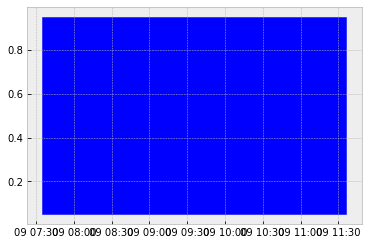

In [65]:
good_sections = incandescent_lamp.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [21]:
good_sections.combined()

[TimeFrame(start='2023-06-09 09:34:38+02:00', end='2023-06-09 13:36:19+02:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [66]:
incandescent_lamp.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALMH::

In [67]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [68]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [69]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='dsualmh', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [70]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['power', 'frequency', 'voltage', 'current', 'pf']

In [71]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['power', 'frequency', 'voltage', 'current', 'pf']

In [72]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (horno)


['power', 'frequency', 'voltage', 'current', 'pf']

In [73]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (micro)


['power', 'frequency', 'voltage', 'current', 'pf']

In [74]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (tv)


['power', 'frequency', 'voltage', 'current', 'pf']

In [75]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (hervidor)


['power', 'frequency', 'voltage', 'current', 'pf']

In [76]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (aspiradora)


['power', 'frequency', 'voltage', 'current', 'pf']

In [77]:
elec[7].available_physical_quantities() #medidas de ElecMeter 7 (estufa)

['power', 'frequency', 'voltage', 'current', 'pf']

In [78]:
elec[8].available_physical_quantities() #medidas de ElecMeter 8 (calentador)

['power', 'frequency', 'voltage', 'current', 'pf']

In [79]:
elec[9].available_physical_quantities() #medidas de ElecMeter 9 (ventilador)

['power', 'frequency', 'voltage', 'current', 'pf']

In [80]:
elec[10].available_physical_quantities() #medidas de ElecMeter 10 (nevera)

['power', 'frequency', 'voltage', 'current', 'pf']

In [81]:
elec[11].available_physical_quantities() #medidas de ElecMeter 6 (congelador)

['power', 'frequency', 'voltage', 'current', 'pf']

## Medidas disponibles relativas a la potencia


In [82]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [83]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [84]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [85]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [86]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [87]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [88]:
elec[7].available_ac_types('power') #medidas de potencia de ElecMeter 7

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [89]:
elec[8].available_ac_types('power') #medidas de potencia de ElecMeter 8

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [90]:
elec[9].available_ac_types('power') #medidas de potencia de ElecMeter 9

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [91]:
elec[10].available_ac_types('power') #medidas de potencia de ElecMeter 10

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [92]:
elec[11].available_ac_types('power') #medidas de potencia de ElecMeter 11

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [93]:
fan = elec['fan']
fan.available_columns()

[('current', 'armonic49'),
 ('power', 'armonic11'),
 ('current', 'armonic34'),
 ('current', 'armonic43'),
 ('power', 'armonic36'),
 ('power', 'armonic6'),
 ('voltage', 'armonic12'),
 ('voltage', 'armonic29'),
 ('current', 'armonic44'),
 ('power', 'armonic34'),
 ('current', 'armonic33'),
 ('power', 'armonic35'),
 ('current', 'armonic4'),
 ('current', 'armonic7'),
 ('voltage', 'armonic25'),
 ('power', 'armonic26'),
 ('power', 'armonic16'),
 ('frequency', None),
 ('current', 'armonic30'),
 ('power', 'armonic22'),
 ('current', 'armonic13'),
 ('power', 'armonic48'),
 ('voltage', 'armonic3'),
 ('power', 'armonic25'),
 ('voltage', 'armonic20'),
 ('current', 'armonic3'),
 ('voltage', 'armonic38'),
 ('voltage', 'armonic32'),
 ('power', 'armonic29'),
 ('power', 'armonic18'),
 ('voltage', 'armonic9'),
 ('voltage', 'armonic24'),
 ('current', 'armonic15'),
 ('voltage', 'armonic46'),
 ('current', 'armonic21'),
 ('current', 'armonic35'),
 ('current', 'armonic25'),
 ('current', 'armonic31'),
 ('power'

In [95]:
incandescent_lamp = elec['incandescent lamp']
incandescent_lamp.available_columns()

[('current', 'armonic49'),
 ('power', 'armonic11'),
 ('current', 'armonic34'),
 ('current', 'armonic43'),
 ('power', 'armonic36'),
 ('power', 'armonic6'),
 ('voltage', 'armonic12'),
 ('voltage', 'armonic29'),
 ('current', 'armonic44'),
 ('power', 'armonic34'),
 ('current', 'armonic33'),
 ('power', 'armonic35'),
 ('current', 'armonic4'),
 ('current', 'armonic7'),
 ('voltage', 'armonic25'),
 ('power', 'armonic26'),
 ('power', 'armonic16'),
 ('frequency', None),
 ('current', 'armonic30'),
 ('power', 'armonic22'),
 ('current', 'armonic13'),
 ('power', 'armonic48'),
 ('voltage', 'armonic3'),
 ('power', 'armonic25'),
 ('voltage', 'armonic20'),
 ('current', 'armonic3'),
 ('voltage', 'armonic38'),
 ('voltage', 'armonic32'),
 ('power', 'armonic29'),
 ('power', 'armonic18'),
 ('voltage', 'armonic9'),
 ('voltage', 'armonic24'),
 ('current', 'armonic15'),
 ('voltage', 'armonic46'),
 ('current', 'armonic21'),
 ('current', 'armonic35'),
 ('current', 'armonic25'),
 ('current', 'armonic31'),
 ('power'

In [96]:
fan = elec['fan']
fan.available_columns()

[('current', 'armonic49'),
 ('power', 'armonic11'),
 ('current', 'armonic34'),
 ('current', 'armonic43'),
 ('power', 'armonic36'),
 ('power', 'armonic6'),
 ('voltage', 'armonic12'),
 ('voltage', 'armonic29'),
 ('current', 'armonic44'),
 ('power', 'armonic34'),
 ('current', 'armonic33'),
 ('power', 'armonic35'),
 ('current', 'armonic4'),
 ('current', 'armonic7'),
 ('voltage', 'armonic25'),
 ('power', 'armonic26'),
 ('power', 'armonic16'),
 ('frequency', None),
 ('current', 'armonic30'),
 ('power', 'armonic22'),
 ('current', 'armonic13'),
 ('power', 'armonic48'),
 ('voltage', 'armonic3'),
 ('power', 'armonic25'),
 ('voltage', 'armonic20'),
 ('current', 'armonic3'),
 ('voltage', 'armonic38'),
 ('voltage', 'armonic32'),
 ('power', 'armonic29'),
 ('power', 'armonic18'),
 ('voltage', 'armonic9'),
 ('voltage', 'armonic24'),
 ('current', 'armonic15'),
 ('voltage', 'armonic46'),
 ('current', 'armonic21'),
 ('current', 'armonic35'),
 ('current', 'armonic25'),
 ('current', 'armonic31'),
 ('power'

In [97]:
television = elec['television']
television.available_columns()

[('current', 'armonic49'),
 ('power', 'armonic11'),
 ('current', 'armonic34'),
 ('current', 'armonic43'),
 ('power', 'armonic36'),
 ('power', 'armonic6'),
 ('voltage', 'armonic12'),
 ('voltage', 'armonic29'),
 ('current', 'armonic44'),
 ('power', 'armonic34'),
 ('current', 'armonic33'),
 ('power', 'armonic35'),
 ('current', 'armonic4'),
 ('current', 'armonic7'),
 ('voltage', 'armonic25'),
 ('power', 'armonic26'),
 ('power', 'armonic16'),
 ('frequency', None),
 ('current', 'armonic30'),
 ('power', 'armonic22'),
 ('current', 'armonic13'),
 ('power', 'armonic48'),
 ('voltage', 'armonic3'),
 ('power', 'armonic25'),
 ('voltage', 'armonic20'),
 ('current', 'armonic3'),
 ('voltage', 'armonic38'),
 ('voltage', 'armonic32'),
 ('power', 'armonic29'),
 ('power', 'armonic18'),
 ('voltage', 'armonic9'),
 ('voltage', 'armonic24'),
 ('current', 'armonic15'),
 ('voltage', 'armonic46'),
 ('current', 'armonic21'),
 ('current', 'armonic35'),
 ('current', 'armonic25'),
 ('current', 'armonic31'),
 ('power'

In [98]:
vacuum_cleaner = elec['vacuum cleaner']
vacuum_cleaner.available_columns()

[('current', 'armonic49'),
 ('power', 'armonic11'),
 ('current', 'armonic34'),
 ('current', 'armonic43'),
 ('power', 'armonic36'),
 ('power', 'armonic6'),
 ('voltage', 'armonic12'),
 ('voltage', 'armonic29'),
 ('current', 'armonic44'),
 ('power', 'armonic34'),
 ('current', 'armonic33'),
 ('power', 'armonic35'),
 ('current', 'armonic4'),
 ('current', 'armonic7'),
 ('voltage', 'armonic25'),
 ('power', 'armonic26'),
 ('power', 'armonic16'),
 ('frequency', None),
 ('current', 'armonic30'),
 ('power', 'armonic22'),
 ('current', 'armonic13'),
 ('power', 'armonic48'),
 ('voltage', 'armonic3'),
 ('power', 'armonic25'),
 ('voltage', 'armonic20'),
 ('current', 'armonic3'),
 ('voltage', 'armonic38'),
 ('voltage', 'armonic32'),
 ('power', 'armonic29'),
 ('power', 'armonic18'),
 ('voltage', 'armonic9'),
 ('voltage', 'armonic24'),
 ('current', 'armonic15'),
 ('voltage', 'armonic46'),
 ('current', 'armonic21'),
 ('current', 'armonic35'),
 ('current', 'armonic25'),
 ('current', 'armonic31'),
 ('power'

In [99]:
microwave = elec['microwave']
microwave.available_columns()

[('current', 'armonic49'),
 ('power', 'armonic11'),
 ('current', 'armonic34'),
 ('current', 'armonic43'),
 ('power', 'armonic36'),
 ('power', 'armonic6'),
 ('voltage', 'armonic12'),
 ('voltage', 'armonic29'),
 ('current', 'armonic44'),
 ('power', 'armonic34'),
 ('current', 'armonic33'),
 ('power', 'armonic35'),
 ('current', 'armonic4'),
 ('current', 'armonic7'),
 ('voltage', 'armonic25'),
 ('power', 'armonic26'),
 ('power', 'armonic16'),
 ('frequency', None),
 ('current', 'armonic30'),
 ('power', 'armonic22'),
 ('current', 'armonic13'),
 ('power', 'armonic48'),
 ('voltage', 'armonic3'),
 ('power', 'armonic25'),
 ('voltage', 'armonic20'),
 ('current', 'armonic3'),
 ('voltage', 'armonic38'),
 ('voltage', 'armonic32'),
 ('power', 'armonic29'),
 ('power', 'armonic18'),
 ('voltage', 'armonic9'),
 ('voltage', 'armonic24'),
 ('current', 'armonic15'),
 ('voltage', 'armonic46'),
 ('current', 'armonic21'),
 ('current', 'armonic35'),
 ('current', 'armonic25'),
 ('current', 'armonic31'),
 ('power'

In [100]:
electric_furnace = elec['electric furnace']
electric_furnace.available_columns()

[('current', 'armonic49'),
 ('power', 'armonic11'),
 ('current', 'armonic34'),
 ('current', 'armonic43'),
 ('power', 'armonic36'),
 ('power', 'armonic6'),
 ('voltage', 'armonic12'),
 ('voltage', 'armonic29'),
 ('current', 'armonic44'),
 ('power', 'armonic34'),
 ('current', 'armonic33'),
 ('power', 'armonic35'),
 ('current', 'armonic4'),
 ('current', 'armonic7'),
 ('voltage', 'armonic25'),
 ('power', 'armonic26'),
 ('power', 'armonic16'),
 ('frequency', None),
 ('current', 'armonic30'),
 ('power', 'armonic22'),
 ('current', 'armonic13'),
 ('power', 'armonic48'),
 ('voltage', 'armonic3'),
 ('power', 'armonic25'),
 ('voltage', 'armonic20'),
 ('current', 'armonic3'),
 ('voltage', 'armonic38'),
 ('voltage', 'armonic32'),
 ('power', 'armonic29'),
 ('power', 'armonic18'),
 ('voltage', 'armonic9'),
 ('voltage', 'armonic24'),
 ('current', 'armonic15'),
 ('voltage', 'armonic46'),
 ('current', 'armonic21'),
 ('current', 'armonic35'),
 ('current', 'armonic25'),
 ('current', 'armonic31'),
 ('power'

In [101]:
electric_space_heater = elec['electric space heater']
electric_space_heater.available_columns()

[('current', 'armonic49'),
 ('power', 'armonic11'),
 ('current', 'armonic34'),
 ('current', 'armonic43'),
 ('power', 'armonic36'),
 ('power', 'armonic6'),
 ('voltage', 'armonic12'),
 ('voltage', 'armonic29'),
 ('current', 'armonic44'),
 ('power', 'armonic34'),
 ('current', 'armonic33'),
 ('power', 'armonic35'),
 ('current', 'armonic4'),
 ('current', 'armonic7'),
 ('voltage', 'armonic25'),
 ('power', 'armonic26'),
 ('power', 'armonic16'),
 ('frequency', None),
 ('current', 'armonic30'),
 ('power', 'armonic22'),
 ('current', 'armonic13'),
 ('power', 'armonic48'),
 ('voltage', 'armonic3'),
 ('power', 'armonic25'),
 ('voltage', 'armonic20'),
 ('current', 'armonic3'),
 ('voltage', 'armonic38'),
 ('voltage', 'armonic32'),
 ('power', 'armonic29'),
 ('power', 'armonic18'),
 ('voltage', 'armonic9'),
 ('voltage', 'armonic24'),
 ('current', 'armonic15'),
 ('voltage', 'armonic46'),
 ('current', 'armonic21'),
 ('current', 'armonic35'),
 ('current', 'armonic25'),
 ('current', 'armonic31'),
 ('power'

In [102]:
electric_shower_heater = elec['electric shower heater']
electric_shower_heater.available_columns()

[('current', 'armonic49'),
 ('power', 'armonic11'),
 ('current', 'armonic34'),
 ('current', 'armonic43'),
 ('power', 'armonic36'),
 ('power', 'armonic6'),
 ('voltage', 'armonic12'),
 ('voltage', 'armonic29'),
 ('current', 'armonic44'),
 ('power', 'armonic34'),
 ('current', 'armonic33'),
 ('power', 'armonic35'),
 ('current', 'armonic4'),
 ('current', 'armonic7'),
 ('voltage', 'armonic25'),
 ('power', 'armonic26'),
 ('power', 'armonic16'),
 ('frequency', None),
 ('current', 'armonic30'),
 ('power', 'armonic22'),
 ('current', 'armonic13'),
 ('power', 'armonic48'),
 ('voltage', 'armonic3'),
 ('power', 'armonic25'),
 ('voltage', 'armonic20'),
 ('current', 'armonic3'),
 ('voltage', 'armonic38'),
 ('voltage', 'armonic32'),
 ('power', 'armonic29'),
 ('power', 'armonic18'),
 ('voltage', 'armonic9'),
 ('voltage', 'armonic24'),
 ('current', 'armonic15'),
 ('voltage', 'armonic46'),
 ('current', 'armonic21'),
 ('current', 'armonic35'),
 ('current', 'armonic25'),
 ('current', 'armonic31'),
 ('power'

In [103]:
fridge = elec[10]
fridge.available_columns()

[('current', 'armonic49'),
 ('power', 'armonic11'),
 ('current', 'armonic34'),
 ('current', 'armonic43'),
 ('power', 'armonic36'),
 ('power', 'armonic6'),
 ('voltage', 'armonic12'),
 ('voltage', 'armonic29'),
 ('current', 'armonic44'),
 ('power', 'armonic34'),
 ('current', 'armonic33'),
 ('power', 'armonic35'),
 ('current', 'armonic4'),
 ('current', 'armonic7'),
 ('voltage', 'armonic25'),
 ('power', 'armonic26'),
 ('power', 'armonic16'),
 ('frequency', None),
 ('current', 'armonic30'),
 ('power', 'armonic22'),
 ('current', 'armonic13'),
 ('power', 'armonic48'),
 ('voltage', 'armonic3'),
 ('power', 'armonic25'),
 ('voltage', 'armonic20'),
 ('current', 'armonic3'),
 ('voltage', 'armonic38'),
 ('voltage', 'armonic32'),
 ('power', 'armonic29'),
 ('power', 'armonic18'),
 ('voltage', 'armonic9'),
 ('voltage', 'armonic24'),
 ('current', 'armonic15'),
 ('voltage', 'armonic46'),
 ('current', 'armonic21'),
 ('current', 'armonic35'),
 ('current', 'armonic25'),
 ('current', 'armonic31'),
 ('power'

In [104]:
freezer = elec[11]
freezer.available_columns()

[('current', 'armonic49'),
 ('power', 'armonic11'),
 ('current', 'armonic34'),
 ('current', 'armonic43'),
 ('power', 'armonic36'),
 ('power', 'armonic6'),
 ('voltage', 'armonic12'),
 ('voltage', 'armonic29'),
 ('current', 'armonic44'),
 ('power', 'armonic34'),
 ('current', 'armonic33'),
 ('power', 'armonic35'),
 ('current', 'armonic4'),
 ('current', 'armonic7'),
 ('voltage', 'armonic25'),
 ('power', 'armonic26'),
 ('power', 'armonic16'),
 ('frequency', None),
 ('current', 'armonic30'),
 ('power', 'armonic22'),
 ('current', 'armonic13'),
 ('power', 'armonic48'),
 ('voltage', 'armonic3'),
 ('power', 'armonic25'),
 ('voltage', 'armonic20'),
 ('current', 'armonic3'),
 ('voltage', 'armonic38'),
 ('voltage', 'armonic32'),
 ('power', 'armonic29'),
 ('power', 'armonic18'),
 ('voltage', 'armonic9'),
 ('voltage', 'armonic24'),
 ('current', 'armonic15'),
 ('voltage', 'armonic46'),
 ('current', 'armonic21'),
 ('current', 'armonic35'),
 ('current', 'armonic25'),
 ('current', 'armonic31'),
 ('power'

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [105]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['power', 'frequency', 'voltage', 'current', 'pf']
Mediciones de Potencia disponibles - Dataset: ['armonic44', 'armonic47', 'armonic14', 'armonic41', 'armonic13', 'armonic26', 'armonic3', 'armonic31', 'armonic50', 'armonic11', 'armonic46', 'armonic20', 'armonic24', 'armonic6', 'armonic25', 'armonic32', 'armonic45', 'armonic29', 'armonic43', 'armonic48', 'armonic36', 'armonic5', 'armonic23', 'armonic9', 'armonic21', 'armonic38', 'armonic12', 'armonic17', 'armonic49', 'reactive', 'armonic15', 'armonic8', 'armonic37', 'armonic4', 'armonic7', 'armonic10', 'armonic2', 'armonic18', 'armonic42', 'armonic19', 'armonic35', 'armonic27', 'armonic16', 'apparent', 'armonic40', 'armonic33', 'armonic22', 'armonic1', 'active', 'armonic28', 'armonic30', 'armonic39', 'armonic34']

Medidas disponibles por cada medidor:
Main: ['power', 'frequency', 'voltage', 'current', 'pf']
Electric furnace: ['power', 'frequency', 'voltage', 'current', 'pf']
Microwave: ['power', 'freque

Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

In [106]:
 def draw_wiring_graph_2(self, show_meter_labels=True):
        graph = self.wiring_graph()
        
        try:
            # Try using graphviz layout...
            pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
            used_graphviz = True
        except:
            # ...and fallback to shell layout if graphviz is not installed or
            # doesn't work
            pos = nx.shell_layout(graph)
            used_graphviz = False
            
        meter_labels = {}
        if show_meter_labels:
            meter_labels = {meter: meter.label() for meter in graph.nodes()}
            for meter, name in meter_labels.items():
                x, y = pos[meter]

                if used_graphviz:
                    if meter.is_site_meter():
                        delta_y = 5
                    else:
                        delta_y = -5
                    
                    plt.text(x, y + delta_y, s=name, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
       

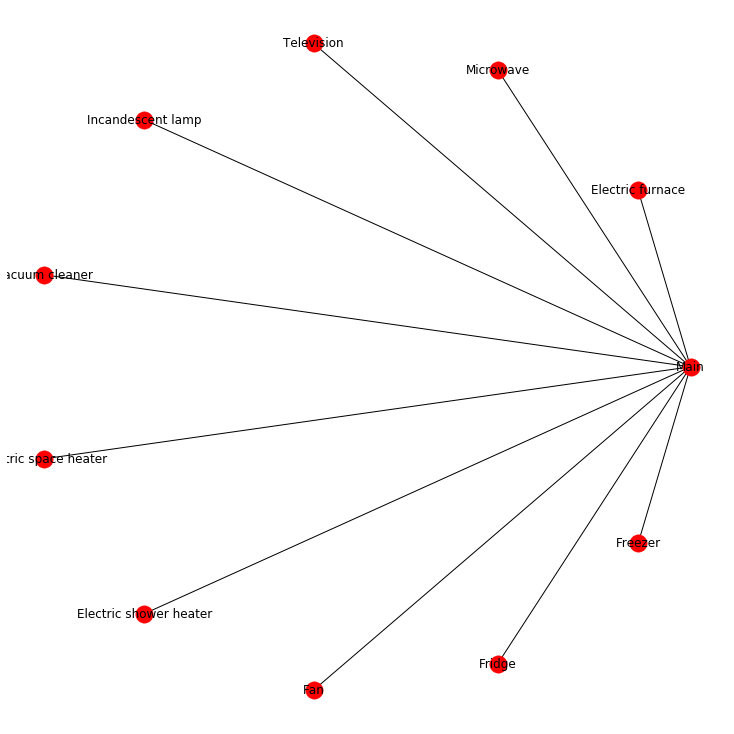

In [107]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [108]:
elec.get_timeframe()

TimeFrame(start='2023-06-09 09:34:38+02:00', end='2023-06-09 13:36:19+02:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 11 (es decir todos menos el principal). 

In [109]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Incandescent lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-06-09 09:34:00+02:00,6.659478,5.627297,2.294427,7.115504,6.501459,7.061233,6.517518,5.679778,6.069320,7.105977
2023-06-09 09:35:00+02:00,6.707092,5.698653,2.361814,7.069730,6.455584,7.005193,6.463110,38.006298,6.088943,6.935067
2023-06-09 09:36:00+02:00,6.668864,5.694866,2.286583,7.041862,6.466071,6.992028,6.483055,42.328163,6.102707,7.086355
2023-06-09 09:37:00+02:00,6.665710,5.679041,2.312449,7.070269,6.468650,6.984940,6.485741,42.195866,6.094377,7.076911
2023-06-09 09:38:00+02:00,6.542811,5.614527,2.273815,6.990903,6.378938,6.853554,6.398967,41.459007,6.008909,7.012403
...,...,...,...,...,...,...,...,...,...,...
2023-06-09 13:32:00+02:00,6.200086,5.260792,36.991589,89.132828,5.787588,5.099467,6.684597,38.864235,5.323210,6.082530
2023-06-09 13:33:00+02:00,6.177860,5.258028,36.880360,89.159805,5.749026,5.168129,6.656781,38.948231,5.304300,6.115490
2023-06-09 13:34:00+02:00,6.191128,5.236365,36.843582,89.147377,5.754669,5.190279,6.675655,38.965096,5.355768,6.124732
2023-06-09 13:35:00+02:00,6.195891,5.308487,30.708815,73.532433,5.789965,5.234657,6.653362,32.654724,5.323315,5.978276


Ahora veamos la potencia reactiva de los medidores del 2 al 6 (todos menos el principal).

In [110]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Incandescent lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-06-09 09:34:00+02:00,-0.952265,-2.036035,-1.746898,-1.688210,-0.086840,-4.206780,-1.238076,-2.092010,-1.376358,-2.247219
2023-06-09 09:35:00+02:00,-0.996361,-2.029599,-1.766816,-1.729704,-0.134160,-4.152298,-1.198263,-1.100987,-1.363500,-2.341162
2023-06-09 09:36:00+02:00,-0.929192,-2.057640,-1.742184,-1.694425,-0.140083,-4.167329,-1.175916,-1.308501,-1.371734,-2.302093
2023-06-09 09:37:00+02:00,-0.983328,-2.000033,-1.756005,-1.714417,-0.112890,-4.148509,-1.211860,-1.585360,-1.392082,-2.241467
2023-06-09 09:38:00+02:00,-0.961886,-2.011293,-1.756204,-1.688043,-0.106796,-4.109009,-1.184674,-1.765816,-1.401023,-2.191934
...,...,...,...,...,...,...,...,...,...,...
2023-06-09 13:32:00+02:00,-0.866758,-1.905120,-8.130317,-0.560644,-0.690289,-3.484761,-1.035453,-1.394301,-1.628120,-2.197676
2023-06-09 13:33:00+02:00,-0.835902,-1.884691,-8.277808,-0.567273,-0.621572,-3.503221,-1.007057,-1.718788,-1.645586,-2.395096
2023-06-09 13:34:00+02:00,-0.810407,-1.835981,-8.217063,-0.541413,-0.575628,-3.485582,-1.017359,-1.921618,-1.625728,-2.507585
2023-06-09 13:35:00+02:00,-0.847250,-1.862680,-6.959409,-0.794972,-0.630249,-3.588269,-1.001137,-1.969772,-1.612331,-2.602485


Por ultimo, veamos la potencia aparente de los medidores del 2 al 11 (todos menos el principal).

In [111]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Incandescent lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-06-09 09:34:00+02:00,6.734798,5.996874,2.899392,7.319202,6.513173,8.224914,6.640430,6.059402,6.229357,7.463022
2023-06-09 09:35:00+02:00,6.790720,6.071053,3.007250,7.286892,6.474675,8.152853,6.581085,38.071407,6.247759,7.507247
2023-06-09 09:36:00+02:00,6.741497,6.068726,2.892583,7.249585,6.476480,8.145453,6.595102,42.349602,6.262519,7.463902
2023-06-09 09:37:00+02:00,6.747662,6.039548,2.944080,7.282463,6.482029,8.131053,6.605154,42.226894,6.258857,7.431890
2023-06-09 09:38:00+02:00,6.621015,5.975497,2.891835,7.197885,6.389395,7.996661,6.515429,41.497829,6.177272,7.367433
...,...,...,...,...,...,...,...,...,...,...
2023-06-09 13:32:00+02:00,6.277371,5.628080,37.882622,89.135750,5.861484,6.198991,6.774255,38.891197,5.578115,6.928940
2023-06-09 13:33:00+02:00,6.245570,5.599850,37.799618,89.162239,5.794959,6.250995,6.741214,38.987782,5.562084,6.593554
2023-06-09 13:34:00+02:00,6.254384,5.569857,37.750412,89.149658,5.800571,6.260343,6.760714,39.013798,5.608616,6.628055
2023-06-09 13:35:00+02:00,6.267454,5.646599,31.573292,73.583214,5.844032,6.356722,6.737170,32.762802,5.573218,6.730316


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [112]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2023-06-09 09:34:00+02:00 to 2023-06-09 13:36:00+02:00
Freq: 60S
Data columns (total 10 columns):
(Electric furnace,)          243 non-null float32
(Microwave,)                 243 non-null float32
(Television,)                243 non-null float32
(Incandescent lamp,)         243 non-null float32
(Vacuum cleaner,)            243 non-null float32
(Electric space heater,)     243 non-null float32
(Electric shower heater,)    243 non-null float32
(Fan,)                       243 non-null float32
(Fridge,)                    243 non-null float32
(Freezer,)                   243 non-null float32
dtypes: float32(10)
memory usage: 11.4 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 2 (Horno)  tenemos la siguinte tabla que nos muestra todas las medidas

In [113]:
t0 = '2023-06-09 09:34:38+02:00' #tiempo inicial
t1 = '2023-06-09 13:36:19+02:00' #tiempo final


df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 



#df_ef = next(elec[2].load()) #DataFrame medidor 
df_ef

physical_quantity           current     power   current               power  \
type                      armonic49 armonic11 armonic34 armonic43 armonic36   
2023-06-09 09:34:38+02:00  0.000291 -0.000012  0.000474  0.000385  0.000001   
2023-06-09 09:34:39+02:00  0.000347 -0.000012  0.000356  0.000599  0.000005   
2023-06-09 09:34:40+02:00  0.000321  0.000006  0.000240  0.000278  0.000003   
2023-06-09 09:34:41+02:00  0.000288 -0.000017  0.000220  0.000260  0.000002   
2023-06-09 09:34:42+02:00  0.000372  0.000026  0.000568  0.000504  0.000001   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000604  0.000056  0.000803  0.000608 -0.000006   
2023-06-09 13:36:16+02:00  0.000650 -0.000074  0.000712  0.000717  0.000002   
2023-06-09 13:36:17+02:00  0.000633  0.000275  0.000482  0.000611 -0.000002   
2023-06-09 13:36:18+02:00  0.000729 -0.000138  0.000867  0.000648  0.000011   
2023-06-09 13:36:19+02:00  0.000380 -0.000005  0.000755  0.000503  0.000003   

physical_quantity                         voltage             current  \
type                           armonic6 armonic12 armonic29 armonic44   
2023-06-09 09:34:38+02:00  2.180000e-05  0.027575  0.053485  0.000590   
2023-06-09 09:34:39+02:00  1.660000e-05  0.018534  0.049409  0.000342   
2023-06-09 09:34:40+02:00  1.000000e-06  0.030609  0.042647  0.000331   
2023-06-09 09:34:41+02:00  1.840000e-05  0.023881  0.049798  0.000260   
2023-06-09 09:34:42+02:00  1.280000e-05  0.021653  0.051958  0.000396   
...                                 ...       ...       ...       ...   
2023-06-09 13:36:15+02:00 -5.399999e-06  0.030250  0.258613  0.000526   
2023-06-09 13:36:16+02:00  1.600000e-06  0.030716  0.254501  0.000638   
2023-06-09 13:36:17+02:00  1.860000e-05  0.023597  0.251194  0.000787   
2023-06-09 13:36:18+02:00  5.999999e-07  0.030853  0.257366  0.000633   
2023-06-09 13:36:19+02:00  2.325000e-05  0.024706  0.256015  0.000673   

physical_quantity             power  ...                                    \
type                      armonic34  ...     armonic40 armonic43 armonic38   
2023-06-09 09:34:38+02:00 -0.000002  ... -2.000000e-07 -0.000004  0.000002   
2023-06-09 09:34:39+02:00  0.000002  ...  1.400000e-06  0.000003 -0.000002   
2023-06-09 09:34:40+02:00  0.000000  ...  1.800000e-06 -0.000003  0.000003   
2023-06-09 09:34:41+02:00  0.000000  ...  1.200000e-06 -0.000002 -0.000001   
2023-06-09 09:34:42+02:00  0.000003  ... -8.000000e-07  0.000003  0.000002   
...                             ...  ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000008  ...  5.200000e-06  0.000017  0.000006   
2023-06-09 13:36:16+02:00  0.000007  ... -4.400000e-06  0.000002 -0.000001   
2023-06-09 13:36:17+02:00  0.000002  ...  4.400000e-06 -0.000001 -0.000002   
2023-06-09 13:36:18+02:00  0.000003  ...  2.400000e-06  0.000022 -0.000006   
2023-06-09 13:36:19+02:00 -0.000003  ...  6.500000e-06  0.000032  0.000008   

physical_quantity           voltage     power   current   voltage   current  \
type                      armonic13 armonic23 armonic32 armonic18 armonic47   
2023-06-09 09:34:38+02:00  0.913906 -0.000062  0.000554  0.025102  0.000483   
2023-06-09 09:34:39+02:00  0.928250 -0.000002  0.000234  0.016736  0.000280   
2023-06-09 09:34:40+02:00  0.927475 -0.000047  0.000434  0.019648  0.000380   
2023-06-09 09:34:41+02:00  0.923932 -0.000015  0.000269  0.027810  0.000414   
2023-06-09 09:34:42+02:00  0.932657 -0.000008  0.000445  0.023567  0.000268   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.728042  0.000038  0.000531  0.020226  0.000597   
2023-06-09 13:36:16+02:00  0.720693 -0.000099  0.000615  0.022519  0.000722   
2023-06-09 13:36:17+02:00  0.726519  0.000110  0.000936  0.022895  0.000538   
2023-06-09 13:36:18+02:00  0.714530 -0.000082  0.000845  0.021495  0.000654   
2023-06-09 13:36:19+02:00  0.690718 -0.000013  0.000580  0.

Se puede visualizar solo la cabecera de los datos

In [114]:
df_ef.head()

physical_quantity           current     power   current               power  \
type                      armonic49 armonic11 armonic34 armonic43 armonic36   
2023-06-09 09:34:38+02:00  0.000291 -0.000012  0.000474  0.000385  0.000001   
2023-06-09 09:34:39+02:00  0.000347 -0.000012  0.000356  0.000599  0.000005   
2023-06-09 09:34:40+02:00  0.000321  0.000006  0.000240  0.000278  0.000003   
2023-06-09 09:34:41+02:00  0.000288 -0.000017  0.000220  0.000260  0.000002   
2023-06-09 09:34:42+02:00  0.000372  0.000026  0.000568  0.000504  0.000001   

physical_quantity                     voltage             current     power  \
type                       armonic6 armonic12 armonic29 armonic44 armonic34   
2023-06-09 09:34:38+02:00  0.000022  0.027575  0.053485  0.000590 -0.000002   
2023-06-09 09:34:39+02:00  0.000017  0.018534  0.049409  0.000342  0.000002   
2023-06-09 09:34:40+02:00  0.000001  0.030609  0.042647  0.000331  0.000000   
2023-06-09 09:34:41+02:00  0.000018  0.023881  0.049798  0.000260  0.000000   
2023-06-09 09:34:42+02:00  0.000013  0.021653  0.051958  0.000396  0.000003   

physical_quantity          ...                                     voltage  \
type                       ...     armonic40 armonic43 armonic38 armonic13   
2023-06-09 09:34:38+02:00  ... -2.000000e-07 -0.000004  0.000002  0.913906   
2023-06-09 09:34:39+02:00  ...  1.400000e-06  0.000003 -0.000002  0.928250   
2023-06-09 09:34:40+02:00  ...  1.800000e-06 -0.000003  0.000003  0.927475   
2023-06-09 09:34:41+02:00  ...  1.200000e-06 -0.000002 -0.000001  0.923932   
2023-06-09 09:34:42+02:00  ... -8.000000e-07  0.000003  0.000002  0.932657   

physical_quantity             power   current   voltage   current     voltage  \
type                      armonic23 armonic32 armonic18 armonic47    armonic1   
2023-06-09 09:34:38+02:00 -0.000062  0.000554  0.025102  0.000483  250.569580   
2023-06-09 09:34:39+02:00 -0.000002  0.000234  0.016736  0.000280  250.578476   
2023-06-09 09:34:40+02:00 -0.000047  0.000434  0.019648  0.000380  250.775543   
2023-06-09 09:34:41+02:00 -0.000015  0.000269  0.027810  0.000414  250.737640   
2023-06-09 09:34:42+02:00 -0.000008  0.000445  0.023567  0.000268  250.566818   

physical_quantity                 power  
type                           armonic8  
2023-06-09 09:34:38+02:00  5.000000e-06  
2023-06-09 09:34:39+02:00  2.600000e-06  
2023-06-09 09:34:40+02:00 -8.000000e-07  
2023-06-09 09:34:41+02:00 -6.800000e-06  
2023-06-09 09:34:42+02:00  2.000000e-06  

[5 rows x 156 columns]

Vemos para el meter nº 3(microwave) tenemos la siguinte tabla que nos muestra todas las medidas

In [117]:
df_microwave = next(elec[3].load())[t0:t1] #DataFrame medidor 
df_microwave

physical_quantity           current     power   current            \
type                      armonic49 armonic11 armonic34 armonic43   
2023-06-09 09:34:38+02:00  0.000331 -0.000017  0.000305  0.000446   
2023-06-09 09:34:39+02:00  0.000336  0.000003  0.000297  0.000463   
2023-06-09 09:34:40+02:00  0.000294  0.000010  0.000261  0.000281   
2023-06-09 09:34:41+02:00  0.000298 -0.000014  0.000269  0.000233   
2023-06-09 09:34:42+02:00  0.000444 -0.000014  0.000913  0.000701   
...                             ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000539 -0.000089  0.000647  0.000519   
2023-06-09 13:36:16+02:00  0.000821  0.000142  0.000974  0.000634   
2023-06-09 13:36:17+02:00  0.000861  0.000282  0.000715  0.000491   
2023-06-09 13:36:18+02:00  0.000676  0.000121  0.001008  0.000681   
2023-06-09 13:36:19+02:00  0.000403  0.000098  0.000529  0.000786   

physical_quantity                 power                 voltage            \
type                          armonic36      armonic6 armonic12 armonic29   
2023-06-09 09:34:38+02:00  2.000000e-06  5.200000e-06  0.027575  0.053485   
2023-06-09 09:34:39+02:00  6.400000e-06  1.020000e-05  0.018534  0.049409   
2023-06-09 09:34:40+02:00  4.200000e-06  1.740000e-05  0.030609  0.042647   
2023-06-09 09:34:41+02:00  4.547474e-14  2.460000e-05  0.023881  0.049798   
2023-06-09 09:34:42+02:00 -2.000001e-07  1.160000e-05  0.021653  0.051958   
...                                 ...           ...       ...       ...   
2023-06-09 13:36:15+02:00 -2.400000e-06 -1.500000e-05  0.030250  0.258613   
2023-06-09 13:36:16+02:00  2.000000e-06  1.360000e-05  0.030716  0.254501   
2023-06-09 13:36:17+02:00  6.000001e-07 -8.000001e-07  0.023597  0.251194   
2023-06-09 13:36:18+02:00  2.000000e-06 -1.400000e-06  0.030853  0.257366   
2023-06-09 13:36:19+02:00 -3.250000e-06 -2.400000e-05  0.024706  0.256015   

physical_quantity           current         power  ...                \
type                      armonic44     armonic34  ...     armonic40   
2023-06-09 09:34:38+02:00  0.000450 -6.000000e-07  ...  1.400000e-06   
2023-06-09 09:34:39+02:00  0.000365  3.200000e-06  ... -1.200000e-06   
2023-06-09 09:34:40+02:00  0.000377 -8.000000e-07  ... -1.200000e-06   
2023-06-09 09:34:41+02:00  0.000392  1.600000e-06  ...  1.600000e-06   
2023-06-09 09:34:42+02:00  0.000530 -7.400000e-06  ... -6.000000e-07   
...                             ...           ...  ...           ...   
2023-06-09 13:36:15+02:00  0.000411  3.200000e-06  ...  6.000000e-06   
2023-06-09 13:36:16+02:00  0.001010  6.400000e-06  ... -4.800000e-06   
2023-06-09 13:36:17+02:00  0.000745  5.000000e-06  ...  4.200000e-06   
2023-06-09 13:36:18+02:00  0.000839  1.900000e-05  ... -2.800000e-06   
2023-06-09 13:36:19+02:00  0.000384 -3.000000e-06  ...  8.750000e-06   

physical_quantity                                       voltage     power  \
type                          armonic43     armonic38 armonic13 armonic23   
2023-06-09 09:34:38+02:00  3.800000e-06  1.800000e-06  0.913906 -0.000011   
2023-06-09 09:34:39+02:00  3.800000e-06 -1.000000e-06  0.928250  0.000014   
2023-06-09 09:34:40+02:00 -8.000000e-07  2.000000e-06  0.927475 -0.000034   
2023-06-09 09:34:41+02:00 -2.200000e-06 -4.000000e-07  0.923932 -0.000007   
2023-06-09 09:34:42+02:00 -2.000000e-07 -3.999999e-07  0.932657 -0.000127   
...                                 ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  5.999999e-06  2.000000e-06  0.728042 -0.000033   
2023-06-09 13:36:16+02:00  2.300000e-05  4.000000e-06  0.720693  0.000070   
2023-06-09 13:36:17+02:00 -3.599999e-06  1.800000e-06  0.726519 -0.000321   
2023-06-09 13:36:18+02:00 -3.640000e-05  4.000000e-07  0.714530 -0.000074   
2023-06-09 13:36:19+02:00  4.950000e-05  7.000000e-06  0.690718  0.000004   

physical_quantity           current   voltage   current     voltage  \
type                      armonic32 armonic18 armonic47    armonic1   
2023-06-09 09:34:38

Vemos para el meter nº 4(tv)  tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [118]:
df_tv = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
df_tv

physical_quantity           current     power   current            \
type                      armonic49 armonic11 armonic34 armonic43   
2023-06-09 09:34:38+02:00  0.000294  0.000018  0.000349  0.000412   
2023-06-09 09:34:39+02:00  0.000489 -0.000002  0.000219  0.000242   
2023-06-09 09:34:40+02:00  0.000709 -0.000005  0.000286  0.000543   
2023-06-09 09:34:41+02:00  0.000291 -0.000017  0.000305  0.000353   
2023-06-09 09:34:42+02:00  0.000197 -0.000006  0.000331  0.000257   
...                             ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000716  0.000207  0.000489  0.000662   
2023-06-09 13:36:16+02:00  0.000337  0.000108  0.000903  0.000764   
2023-06-09 13:36:17+02:00  0.000510 -0.000021  0.000465  0.000587   
2023-06-09 13:36:18+02:00  0.000477 -0.000225  0.000671  0.000767   
2023-06-09 13:36:19+02:00  0.000694  0.000775  0.000722  0.000591   

physical_quantity                 power             voltage            \
type                          armonic36  armonic6 armonic12 armonic29   
2023-06-09 09:34:38+02:00 -6.000000e-07  0.000016  0.026570  0.048033   
2023-06-09 09:34:39+02:00  2.800000e-06  0.000011  0.016690  0.044937   
2023-06-09 09:34:40+02:00  1.800000e-06  0.000021  0.026544  0.042969   
2023-06-09 09:34:41+02:00  1.600000e-06 -0.000001  0.018357  0.044877   
2023-06-09 09:34:42+02:00  6.000000e-07  0.000015  0.024667  0.047773   
...                                 ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  1.800000e-06  0.000009  0.025583  0.257669   
2023-06-09 13:36:16+02:00  4.600000e-06  0.000015  0.024315  0.252800   
2023-06-09 13:36:17+02:00  3.600000e-06  0.000014  0.025880  0.253979   
2023-06-09 13:36:18+02:00  2.800000e-06 -0.000009  0.023882  0.252164   
2023-06-09 13:36:19+02:00  2.250000e-06 -0.000003  0.030963  0.251635   

physical_quantity           current         power  ...                \
type                      armonic44     armonic34  ...     armonic40   
2023-06-09 09:34:38+02:00  0.000437  1.000000e-06  ...  2.000000e-07   
2023-06-09 09:34:39+02:00  0.000505  1.600000e-06  ...  1.000000e-06   
2023-06-09 09:34:40+02:00  0.000347  1.400000e-06  ...  1.200000e-06   
2023-06-09 09:34:41+02:00  0.000548 -4.000000e-07  ... -4.547474e-14   
2023-06-09 09:34:42+02:00  0.000263  1.400000e-06  ...  9.094947e-14   
...                             ...           ...  ...           ...   
2023-06-09 13:36:15+02:00  0.000624  1.400000e-06  ...  6.000000e-06   
2023-06-09 13:36:16+02:00  0.000632  2.200000e-06  ... -2.400000e-06   
2023-06-09 13:36:17+02:00  0.000364  2.800000e-06  ...  3.800000e-06   
2023-06-09 13:36:18+02:00  0.000519  5.800000e-06  ... -2.000000e-06   
2023-06-09 13:36:19+02:00  0.000624 -1.250000e-06  ... -4.999999e-07   

physical_quantity                                       voltage     power  \
type                          armonic43     armonic38 armonic13 armonic23   
2023-06-09 09:34:38+02:00 -2.600000e-06  4.000000e-07  0.915704 -0.000022   
2023-06-09 09:34:39+02:00  2.400000e-06  1.800000e-06  0.920923 -0.000029   
2023-06-09 09:34:40+02:00  2.000000e-06  2.600000e-06  0.926189 -0.000085   
2023-06-09 09:34:41+02:00  4.600000e-06  8.000000e-07  0.917358 -0.000064   
2023-06-09 09:34:42+02:00 -4.000000e-07  4.000000e-07  0.933361 -0.000070   
...                                 ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  4.280000e-05  5.000000e-06  0.738758 -0.000268   
2023-06-09 13:36:16+02:00 -2.200000e-05  1.400000e-06  0.720424 -0.000156   
2023-06-09 13:36:17+02:00 -9.599999e-06  1.600000e-06  0.710963 -0.000031   
2023-06-09 13:36:18+02:00 -3.200000e-06  1.800000e-06  0.721334 -0.000089   
2023-06-09 13:36:19+02:00  1.725000e-05  1.750000e-06  0.707599  0.000070   

physical_quantity           current   voltage   current     voltage  \
type                      armonic32 armonic18 armonic47    armonic1   
2023-06-09 09:34:38+02:00  0.000406  0.021083  0.000352  249.519699   


Veamos para el meter nº 5(bulb)  tenemos la siguinte tabla que nos muestra todas las medidas

In [119]:
df_bulb = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_bulb

physical_quantity           current         power   current            \
type                      armonic49     armonic11 armonic34 armonic43   
2023-06-09 09:34:38+02:00  0.000415  2.000002e-07  0.000304  0.000478   
2023-06-09 09:34:39+02:00  0.000337  1.140000e-05  0.000412  0.000458   
2023-06-09 09:34:40+02:00  0.000231  8.200001e-06  0.000302  0.000323   
2023-06-09 09:34:41+02:00  0.000206  2.400000e-06  0.000349  0.000233   
2023-06-09 09:34:42+02:00  0.000337  8.400000e-06  0.000289  0.000425   
...                             ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000641 -1.028000e-04  0.000690  0.000508   
2023-06-09 13:36:16+02:00  0.000690  2.178000e-04  0.000802  0.000606   
2023-06-09 13:36:17+02:00  0.000718  2.860000e-04  0.000430  0.000379   
2023-06-09 13:36:18+02:00  0.000608  2.190000e-04  0.000687  0.000454   
2023-06-09 13:36:19+02:00  0.000590  1.027500e-04  0.000508  0.000611   

physical_quantity                 power             voltage            \
type                          armonic36  armonic6 armonic12 armonic29   
2023-06-09 09:34:38+02:00  3.000000e-06  0.000014  0.027575  0.053485   
2023-06-09 09:34:39+02:00  3.800000e-06  0.000013  0.018534  0.049409   
2023-06-09 09:34:40+02:00  4.000000e-06  0.000006  0.030609  0.042647   
2023-06-09 09:34:41+02:00  1.000000e-06  0.000006  0.023881  0.049798   
2023-06-09 09:34:42+02:00  2.000000e-07  0.000010  0.021653  0.051958   
...                                 ...       ...       ...       ...   
2023-06-09 13:36:15+02:00 -1.200000e-06 -0.000012  0.030250  0.258613   
2023-06-09 13:36:16+02:00  4.800000e-06  0.000013  0.030716  0.254501   
2023-06-09 13:36:17+02:00  1.000000e-06 -0.000012  0.023597  0.251194   
2023-06-09 13:36:18+02:00  7.800000e-06 -0.000005  0.030853  0.257366   
2023-06-09 13:36:19+02:00  1.000000e-06 -0.000016  0.024706  0.256015   

physical_quantity           current         power  ...                \
type                      armonic44     armonic34  ...     armonic40   
2023-06-09 09:34:38+02:00  0.000412  6.000000e-07  ...  1.800000e-06   
2023-06-09 09:34:39+02:00  0.000357  1.600000e-06  ...  6.000000e-07   
2023-06-09 09:34:40+02:00  0.000322 -2.000000e-06  ...  6.000000e-07   
2023-06-09 09:34:41+02:00  0.000408  3.400000e-06  ...  1.000000e-06   
2023-06-09 09:34:42+02:00  0.000381 -1.600000e-06  ...  1.200000e-06   
...                             ...           ...  ...           ...   
2023-06-09 13:36:15+02:00  0.000351  6.000000e-06  ...  6.400000e-06   
2023-06-09 13:36:16+02:00  0.000873  4.800000e-06  ... -2.600000e-06   
2023-06-09 13:36:17+02:00  0.000712  1.400000e-06  ...  4.000000e-06   
2023-06-09 13:36:18+02:00  0.000548  1.100000e-05  ...  3.600000e-06   
2023-06-09 13:36:19+02:00  0.000434  2.250000e-06  ...  1.125000e-05   

physical_quantity                                       voltage     power  \
type                          armonic43     armonic38 armonic13 armonic23   
2023-06-09 09:34:38+02:00 -5.800000e-06  8.000001e-07  0.913906 -0.000002   
2023-06-09 09:34:39+02:00  2.200000e-06  2.000000e-07  0.928250 -0.000046   
2023-06-09 09:34:40+02:00 -2.800000e-06  2.200000e-06  0.927475  0.000007   
2023-06-09 09:34:41+02:00  6.000000e-07 -1.200000e-06  0.923932 -0.000020   
2023-06-09 09:34:42+02:00  1.600000e-06 -8.000000e-07  0.932657 -0.000060   
...                                 ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  4.200000e-06  2.200000e-06  0.728042  0.000091   
2023-06-09 13:36:16+02:00  2.500000e-05  4.600000e-06  0.720693  0.000062   
2023-06-09 13:36:17+02:00  5.999999e-06  1.200000e-06  0.726519 -0.000379   
2023-06-09 13:36:18+02:00 -3.400000e-06 -3.800000e-06  0.714530 -0.000068   
2023-06-09 13:36:19+02:00  2.900000e-05  5.250000e-06  0.690718  0.000167   

physical_quantity           current   voltage   current     voltage     power  
type                      armonic32 armonic18 armonic47    armonic1  armonic8  
2

Veamos para el meter nº 6(vacum cleaner)  tenemos la siguinte tabla que nos muestra todas las medidas

In [121]:
df_vac = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_vac

physical_quantity           current     power   current            \
type                      armonic49 armonic11 armonic34 armonic43   
2023-06-09 09:34:38+02:00  0.000295 -0.000017  0.000195  0.000514   
2023-06-09 09:34:39+02:00  0.000400  0.000004  0.000401  0.000504   
2023-06-09 09:34:40+02:00  0.000359 -0.000011  0.000187  0.000340   
2023-06-09 09:34:41+02:00  0.000633 -0.000035  0.000284  0.000727   
2023-06-09 09:34:42+02:00  0.000490 -0.000010  0.000235  0.000394   
...                             ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000525 -0.000052  0.000565  0.000536   
2023-06-09 13:36:16+02:00  0.000788  0.000173  0.000842  0.000735   
2023-06-09 13:36:17+02:00  0.000714  0.000391  0.001018  0.000677   
2023-06-09 13:36:18+02:00  0.000752  0.000316  0.000708  0.000583   
2023-06-09 13:36:19+02:00  0.000708  0.000210  0.000620  0.000681   

physical_quantity                 power                 voltage            \
type                          armonic36      armonic6 armonic12 armonic29   
2023-06-09 09:34:38+02:00  4.000000e-07  2.420000e-05  0.027575  0.053485   
2023-06-09 09:34:39+02:00  4.600000e-06  5.000000e-06  0.018534  0.049409   
2023-06-09 09:34:40+02:00  3.600000e-06  3.999997e-07  0.030609  0.042647   
2023-06-09 09:34:41+02:00 -2.273737e-14  5.200000e-06  0.023881  0.049798   
2023-06-09 09:34:42+02:00  6.000001e-07  1.220000e-05  0.021653  0.051958   
...                                 ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  3.000000e-06 -1.780000e-05  0.030250  0.258613   
2023-06-09 13:36:16+02:00  2.200000e-06  2.800000e-05  0.030716  0.254501   
2023-06-09 13:36:17+02:00 -7.800000e-06 -4.800000e-06  0.023597  0.251194   
2023-06-09 13:36:18+02:00  6.600000e-06  1.640000e-05  0.030853  0.257366   
2023-06-09 13:36:19+02:00  2.500000e-06 -2.825000e-05  0.024706  0.256015   

physical_quantity           current         power  ...                \
type                      armonic44     armonic34  ...     armonic40   
2023-06-09 09:34:38+02:00  0.000482 -1.200000e-06  ...  1.200000e-06   
2023-06-09 09:34:39+02:00  0.000440 -5.999999e-07  ...  4.000000e-07   
2023-06-09 09:34:40+02:00  0.000438 -8.000000e-07  ... -8.000000e-07   
2023-06-09 09:34:41+02:00  0.000658 -4.000000e-07  ... -2.000000e-06   
2023-06-09 09:34:42+02:00  0.000404 -2.000000e-06  ...  8.000001e-07   
...                             ...           ...  ...           ...   
2023-06-09 13:36:15+02:00  0.000493  4.600000e-06  ...  7.600000e-06   
2023-06-09 13:36:16+02:00  0.000934  3.200000e-06  ... -6.800000e-06   
2023-06-09 13:36:17+02:00  0.001134  8.600000e-06  ...  8.600000e-06   
2023-06-09 13:36:18+02:00  0.000553  8.600000e-06  ...  5.200000e-06   
2023-06-09 13:36:19+02:00  0.000251  3.750000e-06  ...  6.000000e-06   

physical_quantity                                   voltage     power  \
type                          armonic43 armonic38 armonic13 armonic23   
2023-06-09 09:34:38+02:00 -2.000000e-06  0.000004  0.913906 -0.000036   
2023-06-09 09:34:39+02:00  1.999999e-07  0.000001  0.928250 -0.000032   
2023-06-09 09:34:40+02:00  1.999999e-07  0.000003  0.927475 -0.000034   
2023-06-09 09:34:41+02:00 -5.000000e-06  0.000001  0.923932  0.000101   
2023-06-09 09:34:42+02:00 -6.000000e-07 -0.000003  0.932657 -0.000132   
...                                 ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  1.380000e-05  0.000003  0.728042  0.000021   
2023-06-09 13:36:16+02:00  2.940000e-05  0.000006  0.720693  0.000058   
2023-06-09 13:36:17+02:00  1.920000e-05 -0.000002  0.726519 -0.000334   
2023-06-09 13:36:18+02:00 -7.400000e-06 -0.000004  0.714530  0.000102   
2023-06-09 13:36:19+02:00  8.750000e-06  0.000004  0.690718  0.000038   

physical_quantity           current   voltage   current     voltage  \
type                      armonic32 armonic18 armonic47    armonic1   
2023-06-09 09:34:38+02:00  0.000458  0.025102  0.000464  250.569580   


Veamos para el meter nº 7(electric space heater), es decir calefactor de aceite, tenemos la siguinte tabla que nos muestra todas las medidas

In [124]:

df_esh = next(elec[7].load())[t0:t1] #DataFrame medidor boiler
df_esh

physical_quantity           current     power   current            \
type                      armonic49 armonic11 armonic34 armonic43   
2023-06-09 09:34:38+02:00  0.000241  0.000007  0.000295  0.000377   
2023-06-09 09:34:39+02:00  0.000405 -0.000002  0.000261  0.000497   
2023-06-09 09:34:40+02:00  0.000542 -0.000003  0.000303  0.000503   
2023-06-09 09:34:41+02:00  0.000331 -0.000045  0.000283  0.000380   
2023-06-09 09:34:42+02:00  0.000201  0.000002  0.000297  0.000220   
...                             ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000513 -0.000057  0.000502  0.000412   
2023-06-09 13:36:16+02:00  0.000347  0.000177  0.000671  0.000432   
2023-06-09 13:36:17+02:00  0.000446  0.000252  0.000586  0.000360   
2023-06-09 13:36:18+02:00  0.000607 -0.000018  0.000671  0.000566   
2023-06-09 13:36:19+02:00  0.000503 -0.000251  0.000578  0.000578   

physical_quantity                 power             voltage            \
type                          armonic36  armonic6 armonic12 armonic29   
2023-06-09 09:34:38+02:00  8.000000e-07  0.000002  0.026570  0.048033   
2023-06-09 09:34:39+02:00  2.400000e-06  0.000001  0.016690  0.044937   
2023-06-09 09:34:40+02:00  1.600000e-06 -0.000003  0.026544  0.042969   
2023-06-09 09:34:41+02:00  1.200000e-06  0.000004  0.018357  0.044877   
2023-06-09 09:34:42+02:00  6.000001e-07  0.000004  0.024667  0.047773   
...                                 ...       ...       ...       ...   
2023-06-09 13:36:15+02:00 -6.821211e-14 -0.000002  0.025583  0.257669   
2023-06-09 13:36:16+02:00  4.200000e-06  0.000008  0.024315  0.252800   
2023-06-09 13:36:17+02:00  2.200000e-06 -0.000004  0.025880  0.253979   
2023-06-09 13:36:18+02:00 -1.600000e-06  0.000009  0.023882  0.252164   
2023-06-09 13:36:19+02:00  2.500001e-07 -0.000006  0.030963  0.251635   

physical_quantity           current         power  ...                \
type                      armonic44     armonic34  ...     armonic40   
2023-06-09 09:34:38+02:00  0.000395  1.000000e-06  ...  4.200000e-06   
2023-06-09 09:34:39+02:00  0.000483  2.200000e-06  ...  2.200000e-06   
2023-06-09 09:34:40+02:00  0.000486  1.400000e-06  ...  2.000000e-06   
2023-06-09 09:34:41+02:00  0.000443  3.600000e-06  ...  4.000000e-07   
2023-06-09 09:34:42+02:00  0.000314  8.000000e-07  ...  4.000002e-07   
...                             ...           ...  ...           ...   
2023-06-09 13:36:15+02:00  0.000746 -1.800000e-06  ...  4.200000e-06   
2023-06-09 13:36:16+02:00  0.000451  5.000000e-06  ...  2.200000e-06   
2023-06-09 13:36:17+02:00  0.000468  1.200000e-06  ...  7.000000e-06   
2023-06-09 13:36:18+02:00  0.000546 -5.600000e-06  ...  3.400000e-06   
2023-06-09 13:36:19+02:00  0.000484  5.000000e-06  ...  7.500000e-07   

physical_quantity                                   voltage     power  \
type                      armonic43     armonic38 armonic13 armonic23   
2023-06-09 09:34:38+02:00 -0.000004 -4.000000e-07  0.915704  0.000008   
2023-06-09 09:34:39+02:00  0.000007  1.200000e-06  0.920923 -0.000043   
2023-06-09 09:34:40+02:00  0.000002  1.800000e-06  0.926189 -0.000041   
2023-06-09 09:34:41+02:00  0.000004  2.000000e-07  0.917358 -0.000032   
2023-06-09 09:34:42+02:00  0.000002 -4.000000e-07  0.933361 -0.000017   
...                             ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000010  5.600000e-06  0.738758 -0.000140   
2023-06-09 13:36:16+02:00 -0.000006 -1.000000e-06  0.720424 -0.000016   
2023-06-09 13:36:17+02:00  0.000002  3.600000e-06  0.710963 -0.000148   
2023-06-09 13:36:18+02:00  0.000035 -2.000000e-07  0.721334 -0.000201   
2023-06-09 13:36:19+02:00  0.000014 -4.000000e-06  0.707599 -0.000086   

physical_quantity           current   voltage   current     voltage  \
type                      armonic32 armonic18 armonic47    armonic1   
2023-06-09 09:34:38+02:00  0.000484  0.021083  0.000393  249.519699   
2023-06-09 09:34:39+02:00  0.000394  0.019952  0.000

Veamos para el meter nº 8(fan) tenemos la siguinte tabla que nos muestra todas las medidas

In [125]:

df_fan = next(elec[10].load())[t0:t1] #DataFrame medidor boiler
df_fan

physical_quantity           current     power   current            \
type                      armonic49 armonic11 armonic34 armonic43   
2023-06-09 09:34:38+02:00  0.000293  0.000008  0.000240  0.000361   
2023-06-09 09:34:39+02:00  0.000222  0.000004  0.000254  0.000399   
2023-06-09 09:34:40+02:00  0.000281  0.000057  0.000367  0.000278   
2023-06-09 09:34:41+02:00  0.000281 -0.000037  0.000338  0.000419   
2023-06-09 09:34:42+02:00  0.000357 -0.000003  0.000215  0.000224   
...                             ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000519  0.000008  0.000354  0.000394   
2023-06-09 13:36:16+02:00  0.000317 -0.000016  0.000286  0.000445   
2023-06-09 13:36:17+02:00  0.000236  0.000104  0.000387  0.000412   
2023-06-09 13:36:18+02:00  0.000378 -0.000061  0.000280  0.000527   
2023-06-09 13:36:19+02:00  0.000411  0.000069  0.000198  0.000528   

physical_quantity                 power                 voltage            \
type                          armonic36      armonic6 armonic12 armonic29   
2023-06-09 09:34:38+02:00 -2.000000e-07 -2.600000e-06  0.040691  0.047324   
2023-06-09 09:34:39+02:00 -6.000000e-07 -9.200000e-06  0.030107  0.044984   
2023-06-09 09:34:40+02:00  4.200000e-06 -2.320000e-05  0.058134  0.057760   
2023-06-09 09:34:41+02:00  2.000000e-06 -5.200000e-06  0.067259  0.058461   
2023-06-09 09:34:42+02:00  2.400000e-06  6.000000e-07  0.068261  0.058127   
...                                 ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  8.400000e-06  1.680000e-04  0.110953  0.174269   
2023-06-09 13:36:16+02:00  4.400000e-06 -6.400000e-06  0.037199  0.248992   
2023-06-09 13:36:17+02:00 -8.000000e-07  9.260000e-05  0.077107  0.189497   
2023-06-09 13:36:18+02:00  2.400000e-06  1.740000e-05  0.033235  0.245171   
2023-06-09 13:36:19+02:00  6.000000e-07 -1.000000e-05  0.029249  0.247040   

physical_quantity           current         power  ...                \
type                      armonic44     armonic34  ...     armonic40   
2023-06-09 09:34:38+02:00  0.000394 -1.600000e-06  ...  5.000000e-06   
2023-06-09 09:34:39+02:00  0.000270 -3.800000e-06  ...  3.200000e-06   
2023-06-09 09:34:40+02:00  0.000278 -4.000000e-07  ... -4.000000e-07   
2023-06-09 09:34:41+02:00  0.000370  2.000000e-06  ...  8.800000e-06   
2023-06-09 09:34:42+02:00  0.000384 -1.400000e-06  ... -3.200000e-06   
...                             ...           ...  ...           ...   
2023-06-09 13:36:15+02:00  0.000364  3.000000e-06  ...  4.000000e-07   
2023-06-09 13:36:16+02:00  0.000292  1.200000e-06  ...  8.600000e-06   
2023-06-09 13:36:17+02:00  0.000436 -3.600000e-06  ...  1.780000e-05   
2023-06-09 13:36:18+02:00  0.000549 -2.400000e-06  ...  3.600000e-06   
2023-06-09 13:36:19+02:00  0.000358  0.000000e+00  ... -2.200000e-06   

physical_quantity                                       voltage     power  \
type                          armonic43     armonic38 armonic13 armonic23   
2023-06-09 09:34:38+02:00  6.800000e-06  8.000000e-07  0.887749 -0.000063   
2023-06-09 09:34:39+02:00 -8.000000e-07  2.000000e-07  0.906317 -0.000003   
2023-06-09 09:34:40+02:00  6.000000e-06  4.000000e-07  0.794902 -0.000051   
2023-06-09 09:34:41+02:00  7.000000e-06 -5.400000e-06  0.746543  0.000008   
2023-06-09 09:34:42+02:00  2.000000e-07  5.400000e-06  0.822899 -0.000013   
...                                 ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  3.800000e-06  1.000000e-06  0.679592 -0.000174   
2023-06-09 13:36:16+02:00  4.000000e-07 -2.000000e-07  0.718031 -0.000176   
2023-06-09 13:36:17+02:00  1.580000e-05  2.600000e-06  0.592697 -0.000033   
2023-06-09 13:36:18+02:00  2.620000e-05 -2.200000e-06  0.714649 -0.000125   
2023-06-09 13:36:19+02:00 -5.200000e-06  6.000000e-07  0.688216  0.000044   

physical_quantity           current   voltage   current     voltage  \
type                      armonic32 armonic18 armonic47    armonic1   
2023-06-09 09:34:38

Veamos para el meter nº 9(fridge) tenemos la siguinte tabla que nos muestra todas las medidas

In [127]:

df_fridge = next(elec[9].load())[t0:t1] #DataFrame medidor boiler
df_freezer

physical_quantity           current     power   current            \
type                      armonic49 armonic11 armonic34 armonic43   
2023-06-09 09:34:38+02:00  0.000293  0.000008  0.000240  0.000361   
2023-06-09 09:34:39+02:00  0.000222  0.000004  0.000254  0.000399   
2023-06-09 09:34:40+02:00  0.000281  0.000057  0.000367  0.000278   
2023-06-09 09:34:41+02:00  0.000281 -0.000037  0.000338  0.000419   
2023-06-09 09:34:42+02:00  0.000357 -0.000003  0.000215  0.000224   
...                             ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000519  0.000008  0.000354  0.000394   
2023-06-09 13:36:16+02:00  0.000317 -0.000016  0.000286  0.000445   
2023-06-09 13:36:17+02:00  0.000236  0.000104  0.000387  0.000412   
2023-06-09 13:36:18+02:00  0.000378 -0.000061  0.000280  0.000527   
2023-06-09 13:36:19+02:00  0.000411  0.000069  0.000198  0.000528   

physical_quantity                 power                 voltage            \
type                          armonic36      armonic6 armonic12 armonic29   
2023-06-09 09:34:38+02:00 -2.000000e-07 -2.600000e-06  0.040691  0.047324   
2023-06-09 09:34:39+02:00 -6.000000e-07 -9.200000e-06  0.030107  0.044984   
2023-06-09 09:34:40+02:00  4.200000e-06 -2.320000e-05  0.058134  0.057760   
2023-06-09 09:34:41+02:00  2.000000e-06 -5.200000e-06  0.067259  0.058461   
2023-06-09 09:34:42+02:00  2.400000e-06  6.000000e-07  0.068261  0.058127   
...                                 ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  8.400000e-06  1.680000e-04  0.110953  0.174269   
2023-06-09 13:36:16+02:00  4.400000e-06 -6.400000e-06  0.037199  0.248992   
2023-06-09 13:36:17+02:00 -8.000000e-07  9.260000e-05  0.077107  0.189497   
2023-06-09 13:36:18+02:00  2.400000e-06  1.740000e-05  0.033235  0.245171   
2023-06-09 13:36:19+02:00  6.000000e-07 -1.000000e-05  0.029249  0.247040   

physical_quantity           current         power  ...                \
type                      armonic44     armonic34  ...     armonic40   
2023-06-09 09:34:38+02:00  0.000394 -1.600000e-06  ...  5.000000e-06   
2023-06-09 09:34:39+02:00  0.000270 -3.800000e-06  ...  3.200000e-06   
2023-06-09 09:34:40+02:00  0.000278 -4.000000e-07  ... -4.000000e-07   
2023-06-09 09:34:41+02:00  0.000370  2.000000e-06  ...  8.800000e-06   
2023-06-09 09:34:42+02:00  0.000384 -1.400000e-06  ... -3.200000e-06   
...                             ...           ...  ...           ...   
2023-06-09 13:36:15+02:00  0.000364  3.000000e-06  ...  4.000000e-07   
2023-06-09 13:36:16+02:00  0.000292  1.200000e-06  ...  8.600000e-06   
2023-06-09 13:36:17+02:00  0.000436 -3.600000e-06  ...  1.780000e-05   
2023-06-09 13:36:18+02:00  0.000549 -2.400000e-06  ...  3.600000e-06   
2023-06-09 13:36:19+02:00  0.000358  0.000000e+00  ... -2.200000e-06   

physical_quantity                                       voltage     power  \
type                          armonic43     armonic38 armonic13 armonic23   
2023-06-09 09:34:38+02:00  6.800000e-06  8.000000e-07  0.887749 -0.000063   
2023-06-09 09:34:39+02:00 -8.000000e-07  2.000000e-07  0.906317 -0.000003   
2023-06-09 09:34:40+02:00  6.000000e-06  4.000000e-07  0.794902 -0.000051   
2023-06-09 09:34:41+02:00  7.000000e-06 -5.400000e-06  0.746543  0.000008   
2023-06-09 09:34:42+02:00  2.000000e-07  5.400000e-06  0.822899 -0.000013   
...                                 ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  3.800000e-06  1.000000e-06  0.679592 -0.000174   
2023-06-09 13:36:16+02:00  4.000000e-07 -2.000000e-07  0.718031 -0.000176   
2023-06-09 13:36:17+02:00  1.580000e-05  2.600000e-06  0.592697 -0.000033   
2023-06-09 13:36:18+02:00  2.620000e-05 -2.200000e-06  0.714649 -0.000125   
2023-06-09 13:36:19+02:00 -5.200000e-06  6.000000e-07  0.688216  0.000044   

physical_quantity           current   voltage   current     voltage  \
type                      armonic32 armonic18 armonic47    armonic1   
2023-06-09 09:34:38

Veamos para el ultimo meter nº 10(Freezer)  tenemos la siguinte tabla que nos muestra todas las medidas

In [128]:




df_freezer = next(elec[10].load())[t0:t1] #DataFrame medidor boiler
df_freezer

physical_quantity           current     power   current            \
type                      armonic49 armonic11 armonic34 armonic43   
2023-06-09 09:34:38+02:00  0.000293  0.000008  0.000240  0.000361   
2023-06-09 09:34:39+02:00  0.000222  0.000004  0.000254  0.000399   
2023-06-09 09:34:40+02:00  0.000281  0.000057  0.000367  0.000278   
2023-06-09 09:34:41+02:00  0.000281 -0.000037  0.000338  0.000419   
2023-06-09 09:34:42+02:00  0.000357 -0.000003  0.000215  0.000224   
...                             ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000519  0.000008  0.000354  0.000394   
2023-06-09 13:36:16+02:00  0.000317 -0.000016  0.000286  0.000445   
2023-06-09 13:36:17+02:00  0.000236  0.000104  0.000387  0.000412   
2023-06-09 13:36:18+02:00  0.000378 -0.000061  0.000280  0.000527   
2023-06-09 13:36:19+02:00  0.000411  0.000069  0.000198  0.000528   

physical_quantity                 power                 voltage            \
type                          armonic36      armonic6 armonic12 armonic29   
2023-06-09 09:34:38+02:00 -2.000000e-07 -2.600000e-06  0.040691  0.047324   
2023-06-09 09:34:39+02:00 -6.000000e-07 -9.200000e-06  0.030107  0.044984   
2023-06-09 09:34:40+02:00  4.200000e-06 -2.320000e-05  0.058134  0.057760   
2023-06-09 09:34:41+02:00  2.000000e-06 -5.200000e-06  0.067259  0.058461   
2023-06-09 09:34:42+02:00  2.400000e-06  6.000000e-07  0.068261  0.058127   
...                                 ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  8.400000e-06  1.680000e-04  0.110953  0.174269   
2023-06-09 13:36:16+02:00  4.400000e-06 -6.400000e-06  0.037199  0.248992   
2023-06-09 13:36:17+02:00 -8.000000e-07  9.260000e-05  0.077107  0.189497   
2023-06-09 13:36:18+02:00  2.400000e-06  1.740000e-05  0.033235  0.245171   
2023-06-09 13:36:19+02:00  6.000000e-07 -1.000000e-05  0.029249  0.247040   

physical_quantity           current         power  ...                \
type                      armonic44     armonic34  ...     armonic40   
2023-06-09 09:34:38+02:00  0.000394 -1.600000e-06  ...  5.000000e-06   
2023-06-09 09:34:39+02:00  0.000270 -3.800000e-06  ...  3.200000e-06   
2023-06-09 09:34:40+02:00  0.000278 -4.000000e-07  ... -4.000000e-07   
2023-06-09 09:34:41+02:00  0.000370  2.000000e-06  ...  8.800000e-06   
2023-06-09 09:34:42+02:00  0.000384 -1.400000e-06  ... -3.200000e-06   
...                             ...           ...  ...           ...   
2023-06-09 13:36:15+02:00  0.000364  3.000000e-06  ...  4.000000e-07   
2023-06-09 13:36:16+02:00  0.000292  1.200000e-06  ...  8.600000e-06   
2023-06-09 13:36:17+02:00  0.000436 -3.600000e-06  ...  1.780000e-05   
2023-06-09 13:36:18+02:00  0.000549 -2.400000e-06  ...  3.600000e-06   
2023-06-09 13:36:19+02:00  0.000358  0.000000e+00  ... -2.200000e-06   

physical_quantity                                       voltage     power  \
type                          armonic43     armonic38 armonic13 armonic23   
2023-06-09 09:34:38+02:00  6.800000e-06  8.000000e-07  0.887749 -0.000063   
2023-06-09 09:34:39+02:00 -8.000000e-07  2.000000e-07  0.906317 -0.000003   
2023-06-09 09:34:40+02:00  6.000000e-06  4.000000e-07  0.794902 -0.000051   
2023-06-09 09:34:41+02:00  7.000000e-06 -5.400000e-06  0.746543  0.000008   
2023-06-09 09:34:42+02:00  2.000000e-07  5.400000e-06  0.822899 -0.000013   
...                                 ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  3.800000e-06  1.000000e-06  0.679592 -0.000174   
2023-06-09 13:36:16+02:00  4.000000e-07 -2.000000e-07  0.718031 -0.000176   
2023-06-09 13:36:17+02:00  1.580000e-05  2.600000e-06  0.592697 -0.000033   
2023-06-09 13:36:18+02:00  2.620000e-05 -2.200000e-06  0.714649 -0.000125   
2023-06-09 13:36:19+02:00 -5.200000e-06  6.000000e-07  0.688216  0.000044   

physical_quantity           current   voltage   current     voltage  \
type                      armonic32 armonic18 armonic47    armonic1   
2023-06-09 09:34:38

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [129]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.9864493457234285

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [130]:
series = next(fan.power_series())
series.head()

2023-06-09 09:34:38+02:00    5.851006
2023-06-09 09:34:39+02:00    5.950320
2023-06-09 09:34:40+02:00    5.738094
2023-06-09 09:34:41+02:00    5.479184
2023-06-09 09:34:42+02:00    5.866570
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [131]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2023-06-09 09:34:38+02:00   -2.357986
2023-06-09 09:34:39+02:00   -2.031962
2023-06-09 09:34:40+02:00   -1.992984
2023-06-09 09:34:41+02:00   -1.940938
2023-06-09 09:34:42+02:00   -1.882722
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [132]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2023-06-09 09:34:38+02:00,-2.357986
2023-06-09 09:34:39+02:00,-2.031962
2023-06-09 09:34:40+02:00,-1.992984
2023-06-09 09:34:41+02:00,-1.940938
2023-06-09 09:34:42+02:00,-1.882722


Para cargar datos de voltaje:

In [133]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity           voltage                                          \
type                      armonic12 armonic29 armonic25  armonic3 armonic20   
2023-06-09 09:34:38+02:00  0.040691  0.047324  0.191434  1.694135  0.021357   
2023-06-09 09:34:39+02:00  0.030107  0.044984  0.217129  1.704222  0.017902   
2023-06-09 09:34:40+02:00  0.058134  0.057760  0.233482  1.854882  0.020711   
2023-06-09 09:34:41+02:00  0.067259  0.058461  0.205216  1.750374  0.031086   
2023-06-09 09:34:42+02:00  0.068261  0.058127  0.175613  1.750615  0.039039   

physical_quantity                                                            \
type                      armonic38 armonic32  armonic9 armonic24 armonic46   
2023-06-09 09:34:38+02:00  0.013709  0.016136  2.089784  0.017989  0.010354   
2023-06-09 09:34:39+02:00  0.012611  0.012610  2.084615  0.012467  0.009626   
2023-06-09 09:34:40+02:00  0.022122  0.018554  1.954415  0.030180  0.009820   
2023-06-09 09:34:41+02:00  0.022519  0.020092  1.891233  0.029653  0.022343   
2023-06-09 09:34:42+02:00  0.025822  0.022706  2.009440  0.028127  0.011870   

physical_quantity          ...                                          \
type                       ... armonic37 armonic41 armonic15 armonic16   
2023-06-09 09:34:38+02:00  ...  0.146389  0.036372  0.198407  0.020738   
2023-06-09 09:34:39+02:00  ...  0.145059  0.032701  0.206178  0.026469   
2023-06-09 09:34:40+02:00  ...  0.157673  0.039388  0.184860  0.040453   
2023-06-09 09:34:41+02:00  ...  0.140615  0.035598  0.149383  0.052309   
2023-06-09 09:34:42+02:00  ...  0.132818  0.038020  0.150118  0.056868   

physical_quantity                                                            \
type                      armonic26 armonic35 armonic42 armonic13 armonic18   
2023-06-09 09:34:38+02:00  0.017758  0.164611  0.018316  0.887749  0.027455   
2023-06-09 09:34:39+02:00  0.012601  0.185548  0.010755  0.906317  0.025046   
2023-06-09 09:34:40+02:00  0.014818  0.187934  0.013414  0.794902  0.035823   
2023-06-09 09:34:41+02:00  0.029029  0.168350  0.018868  0.746543  0.039848   
2023-06-09 09:34:42+02:00  0.029357  0.168922  0.021662  0.822899  0.034378   

physical_quantity                      
type                         armonic1  
2023-06-09 09:34:38+02:00  249.064331  
2023-06-09 09:34:39+02:00  249.115387  
2023-06-09 09:34:40+02:00  248.847702  
2023-06-09 09:34:41+02:00  248.796509  
2023-06-09 09:34:42+02:00  248.861328  

[5 rows x 50 columns]

In [134]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity                 power                              \
type                          armonic11     armonic36      armonic6   
2023-06-09 09:34:38+02:00 -3.200000e-06  2.600000e-06 -5.800000e-06   
2023-06-09 09:34:39+02:00 -3.999998e-07 -6.000000e-07  4.000000e-07   
2023-06-09 09:34:40+02:00  2.560000e-05  1.600000e-06  3.240000e-05   
2023-06-09 09:34:41+02:00  1.320000e-05  3.999997e-07  1.720000e-05   
2023-06-09 09:34:42+02:00  2.400000e-06  2.200000e-06 -1.280000e-05   

physical_quantity                                                          \
type                          armonic34     armonic35 armonic26 armonic16   
2023-06-09 09:34:38+02:00 -9.999999e-07 -3.999998e-07  0.000003 -0.000002   
2023-06-09 09:34:39+02:00 -3.000000e-06  8.800001e-06  0.000002 -0.000003   
2023-06-09 09:34:40+02:00 -5.800000e-06  4.360000e-05 -0.000001 -0.000005   
2023-06-09 09:34:41+02:00  2.200000e-06 -1.900000e-05  0.000003 -0.000009   
2023-06-09 09:34:42+02:00  2.000000e-07 -2.920000e-05  0.000009  0.000021   

physical_quantity                                                ...  \
type                          armonic22     armonic48 armonic25  ...   
2023-06-09 09:34:38+02:00  6.000000e-07  8.000000e-07  0.000032  ...   
2023-06-09 09:34:39+02:00  6.000000e-07  1.800000e-06  0.000046  ...   
2023-06-09 09:34:40+02:00 -4.000000e-07  1.400000e-06  0.000059  ...   
2023-06-09 09:34:41+02:00  5.000000e-06 -2.200000e-06  0.000016  ...   
2023-06-09 09:34:42+02:00  1.260000e-05 -2.200000e-06  0.000034  ...   

physical_quantity                                                            \
type                       armonic3  armonic1 armonic47    active  armonic9   
2023-06-09 09:34:38+02:00 -0.000819  5.846790  0.000003  5.851006 -0.000137   
2023-06-09 09:34:39+02:00 -0.000974  5.943032  0.000013  5.950320  0.000307   
2023-06-09 09:34:40+02:00 -0.000131  5.718900 -0.000003  5.738094  0.000673   
2023-06-09 09:34:41+02:00 -0.000204  5.460998 -0.000006  5.479184  0.000177   
2023-06-09 09:34:42+02:00  0.000064  5.841926 -0.000001  5.866570  0.000187   

physical_quantity                                                          \
type                          armonic40     armonic43 armonic38 armonic23   
2023-06-09 09:34:38+02:00 -8.000000e-07  8.000000e-06  0.000002 -0.000022   
2023-06-09 09:34:39+02:00  1.200000e-06 -1.400000e-06  0.000002 -0.000010   
2023-06-09 09:34:40+02:00  1.800000e-06  8.000001e-07 -0.000002 -0.000005   
2023-06-09 09:34:41+02:00 -4.600000e-06  4.400000e-06  0.000002 -0.000012   
2023-06-09 09:34:42+02:00 -3.000000e-06  1.200000e-06  0.000005 -0.000036   

physical_quantity                    
type                       armonic8  
2023-06-09 09:34:38+02:00  0.000002  
2023-06-09 09:34:39+02:00  0.000005  
2023-06-09 09:34:40+02:00  0.000013  
2023-06-09 09:34:41+02:00  0.000016  
2023-06-09 09:34:42+02:00  0.000003  

[5 rows x 53 columns]

### Cargando especificando el tipo de CA

In [135]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2023-06-09 09:34:38+02:00,5.851006
2023-06-09 09:34:39+02:00,5.950320
2023-06-09 09:34:40+02:00,5.738094
2023-06-09 09:34:41+02:00,5.479184
2023-06-09 09:34:42+02:00,5.866570


### Cargando por remuestreo a un período específico

In [136]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2023-06-09 09:34:00+02:00,5.679778
2023-06-09 09:35:00+02:00,38.006298
2023-06-09 09:36:00+02:00,42.328163
2023-06-09 09:37:00+02:00,42.195866
2023-06-09 09:38:00+02:00,41.459007


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 de REDD:

In [137]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.9864493457234285

## Potencia activa, aparente y reactiva

In [138]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.


physical_quantity           current     power   current               power  \
type                      armonic49 armonic11 armonic34 armonic43 armonic36   
2023-06-09 09:34:00+02:00  0.004849 -0.000239  0.004501  0.006647  0.000018   
2023-06-09 09:35:00+02:00  0.004979 -0.000526  0.004990  0.006730  0.000021   
2023-06-09 09:36:00+02:00  0.004992  0.000142  0.004825  0.006425  0.000016   
2023-06-09 09:37:00+02:00  0.005587  0.000704  0.005174  0.006600  0.000016   
2023-06-09 09:38:00+02:00  0.005176  0.000226  0.005063  0.006845  0.000017   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:32:00+02:00  0.010995  0.027428  0.007682  0.018415  0.000026   
2023-06-09 13:33:00+02:00  0.009739  0.028681  0.006731  0.017726  0.000019   
2023-06-09 13:34:00+02:00  0.010336  0.031661  0.006952  0.017835  0.000025   
2023-06-09 13:35:00+02:00  0.011443  0.028414  0.007399  0.019006  0.000022   
2023-06-09 13:36:00+02:00  0.010540 -0.000525  0.008037  0.012803  0.000023   

physical_quantity                     voltage             current     power  \
type                       armonic6 armonic12 armonic29 armonic44 armonic34   
2023-06-09 09:34:00+02:00  0.000091       NaN       NaN  0.004503  0.000011   
2023-06-09 09:35:00+02:00  0.000003       NaN       NaN  0.004620  0.000004   
2023-06-09 09:36:00+02:00  0.000023       NaN       NaN  0.004319  0.000005   
2023-06-09 09:37:00+02:00  0.000020       NaN       NaN  0.004810  0.000013   
2023-06-09 09:38:00+02:00  0.000017       NaN       NaN  0.004648  0.000011   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:32:00+02:00  0.000199       NaN       NaN  0.006298  0.000023   
2023-06-09 13:33:00+02:00  0.000210       NaN       NaN  0.005537  0.000021   
2023-06-09 13:34:00+02:00  0.000266       NaN       NaN  0.005913  0.000027   
2023-06-09 13:35:00+02:00  0.000135       NaN       NaN  0.006024  0.000021   
2023-06-09 13:36:00+02:00  0.000057       NaN       NaN  0.006932  0.000026   

physical_quantity          ...                                 voltage  \
type                       ... armonic40 armonic43 armonic38 armonic13   
2023-06-09 09:34:00+02:00  ...  0.000016  0.000015  0.000012       NaN   
2023-06-09 09:35:00+02:00  ...  0.000010 -0.000013  0.000009       NaN   
2023-06-09 09:36:00+02:00  ...  0.000012 -0.000041  0.000012       NaN   
2023-06-09 09:37:00+02:00  ...  0.000014 -0.000026  0.000013       NaN   
2023-06-09 09:38:00+02:00  ...  0.000017 -0.000040  0.000012       NaN   
...                        ...       ...       ...       ...       ...   
2023-06-09 13:32:00+02:00  ...  0.000027  0.000193  0.000027       NaN   
2023-06-09 13:33:00+02:00  ...  0.000031  0.000299  0.000017       NaN   
2023-06-09 13:34:00+02:00  ...  0.000029  0.000165  0.000026       NaN   
2023-06-09 13:35:00+02:00  ...  0.000028  0.000456  0.000018       NaN   
2023-06-09 13:36:00+02:00  ...  0.000029  0.000168  0.000013       NaN   

physical_quantity             power   current   voltage   current  voltage  \
type                      armonic23 armonic32 armonic18 armonic47 armonic1   
2023-06-09 09:34:00+02:00 -0.001638  0.004428       NaN  0.005236      NaN   
2023-06-09 09:35:00+02:00 -0.001390  0.005113       NaN  0.004905      NaN   
2023-06-09 09:36:00+02:00 -0.001039  0.004745       NaN  0.004783      NaN   
2023-06-09 09:37:00+02:00 -0.000607  0.005102       NaN  0.005428      NaN   
2023-06-09 09:38:00+02:00 -0.001755  0.005057       NaN  0.005410      NaN   
...                             ...       ...       ...       ...      ...   
2023-06-09 13:32:00+02:00 -0.004176  0.007787       NaN  0.015088      NaN   
2023-06-09 13:33:00+02:00 -0.003747  0.006708       NaN  0.013976      NaN   
2023-06-09 13:34:00+02:00 -0.004300  0.007098       NaN  0.014637      NaN   
2023-06-09 13:35:00+02:00 -0.010365  0.007418       NaN  0.015182      NaN   
2023-06-09 13:36:00+02:00 -0.014866  0.007892

### Energia Total

In [139]:
elec.mains().total_energy() # returns kWh

reactive    0.324430
active      7.669096
apparent    7.707773
dtype: float64

In [140]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','Total kWh']
df

11/11 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Día,kWh Sem.,Total kWh
Main,45.69,319.86,7.67
Electric furnace,17.88,125.13,3.00
Microwave,2.49,17.46,0.42
Television,0.45,3.17,0.08
Incandescent lamp,1.15,8.03,0.19
Vacuum cleaner,4.96,34.75,0.83
Electric space heater,6.03,42.20,1.01
Electric shower heater,8.70,60.92,1.46
Fan,0.59,4.14,0.10
Fridge,0.72,5.07,0.12


### Energia por submedidor

Veamos la energia  para el submedidor

In [141]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, dsualmh)","(3, 1, dsualmh)","(4, 1, dsualmh)","(5, 1, dsualmh)","(6, 1, dsualmh)","(7, 1, dsualmh)","(8, 1, dsualmh)","(9, 1, dsualmh)","(10, 1, dsualmh)","(11, 1, dsualmh)"
active,3.000199,0.418728,0.075974,0.192639,0.833169,1.011827,1.460765,0.09922,0.121667,0.105433
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [142]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [143]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [12]:
fraction = elec.submeters().fraction_per_meter().dropna()

1/10 ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

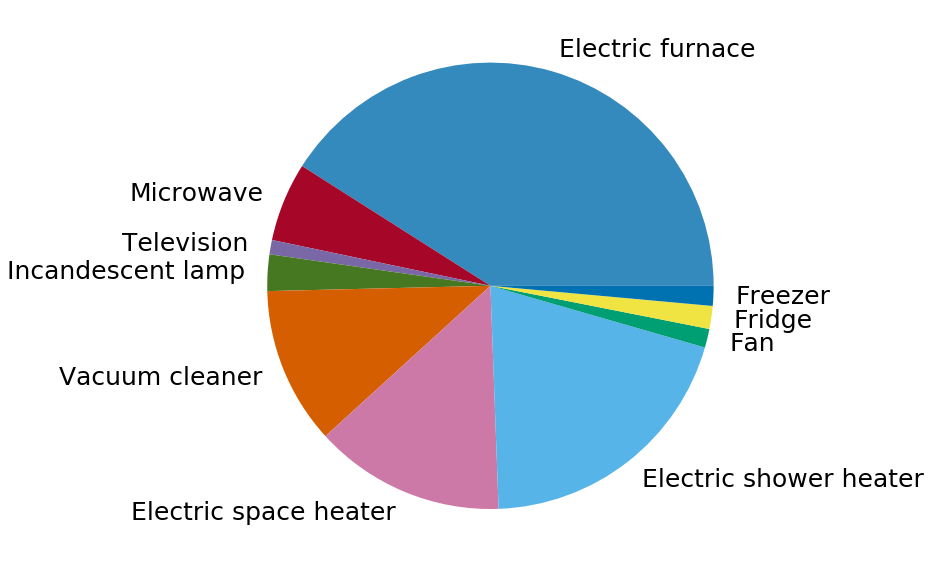

In [16]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10, 30))

# Guarda la salida de fraction.plot en la variable ax
ax = fraction.plot(kind='pie', labels=labels, fontsize=25)

# No mostrar la etiqueta "None"
ax.set_ylabel('')


#guarda gráfico
plt.savefig('./data/images/grafico_tarta.svg', bbox_inches='tight', transparent=True)
pass
# Muestra el gráfico
plt.show()

## Gráficos

### Horno

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

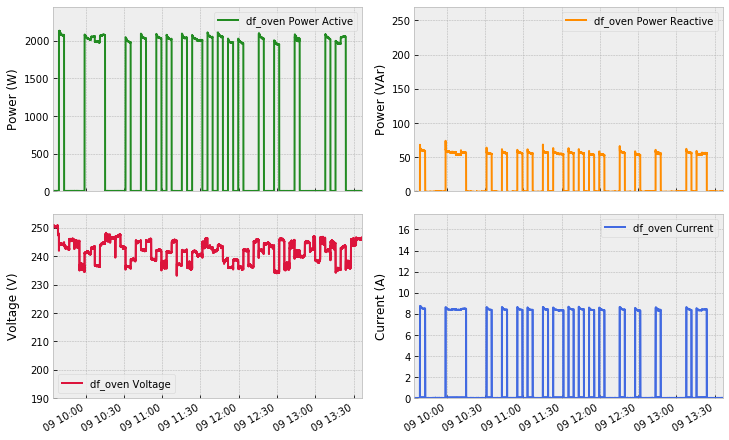

In [151]:


df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ef['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_oven Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_ef['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_oven Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ef['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_oven Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ef['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_oven Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])


ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_horno.svg', bbox_inches='tight', transparent=True)
pass

Ahora vemos la grafica de una aspiradora cuyo consumo es de uno 3.5Amp y no presenta potencia reactiva apreciable

### Microondas

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 4 (Freezer)

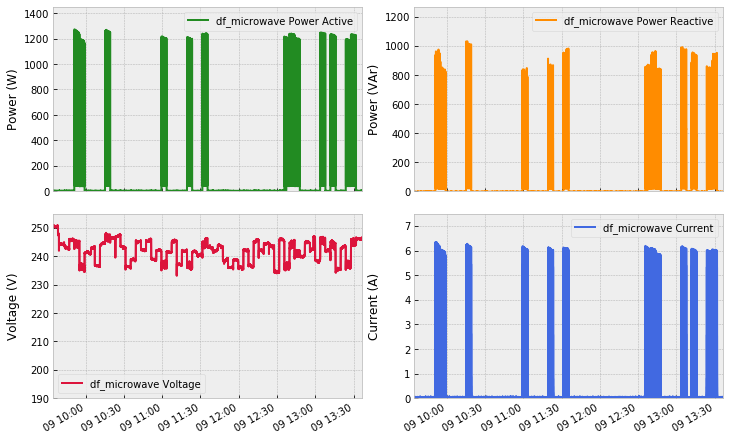

In [152]:


df_mi = next(elec[3].load())#[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_mi['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_microwave Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_mi['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_microwave Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_mi['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_microwave Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_mi['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_microwave Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_microondas.svg', bbox_inches='tight', transparent=True)
pass

### Television

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

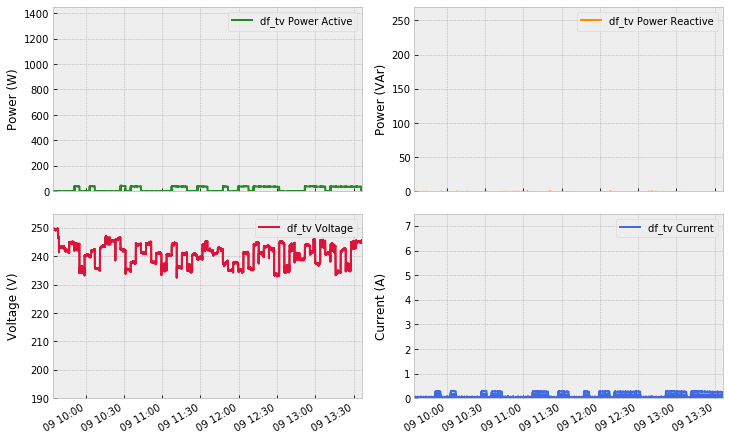

In [153]:


df_tv = next(elec[4].load())#[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

Como se deduce de los graficos , el hervidor esta compuesto unicamente por uan resistencia de alta potencia, motivo por el cual no presente medidas de potencia reactiva y todo sea potencia activa 

### Bulb

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

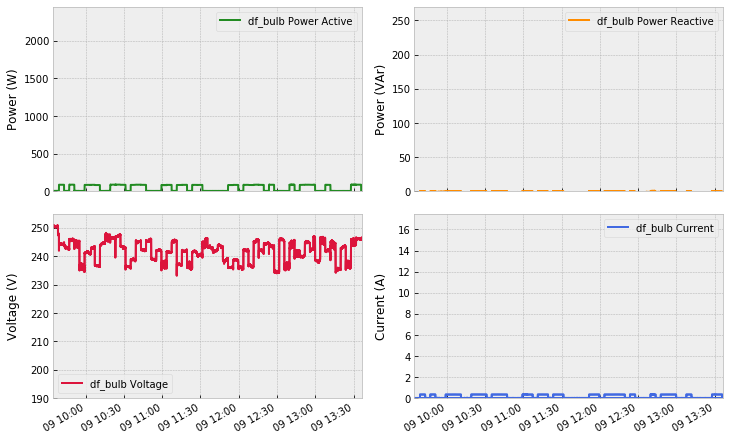

In [154]:

df_bulb = next(elec[5].load())#[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_bulb['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_bulb Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_bulb['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_bulb Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_bulb['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_bulb Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_bulb['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_bulb Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_hervidor.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de una luminaria de bajo consumo en la que al llevar una fuente conmutada practicamente consume el mismo nivel de potencia activa que el de reactiva. Ademas queda registrado un poequeño pico de corriente justo en el momento de encendido. 

### Aspiradora

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

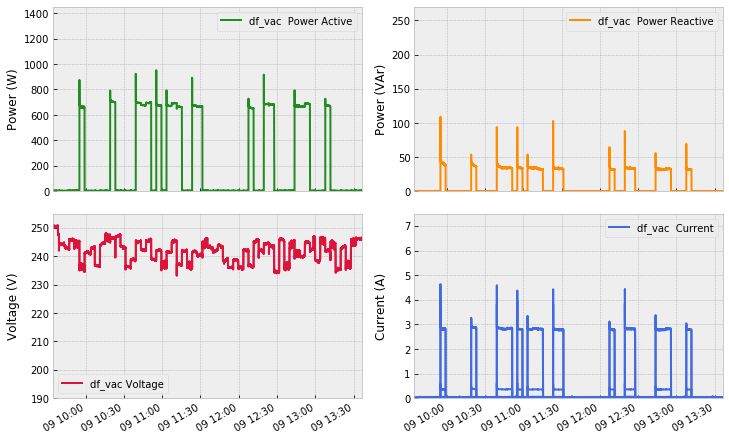

In [155]:



df_vac = next(elec[6].load())#[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vac ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_vac  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vac ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_vac  Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vac ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_vac Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vac ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_vac  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_aspiradora.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de un pequeño ventilador cuyo consumo es casi inapreciable y no presenta energia reaciva. Es llamativo el hecho de que haya fluctuaciones apreciables en la grafica de la tension asi como  tambien un pequeño pico de corriente ( este hecho solo en el momento del arranque). 

## Estufa de aceite

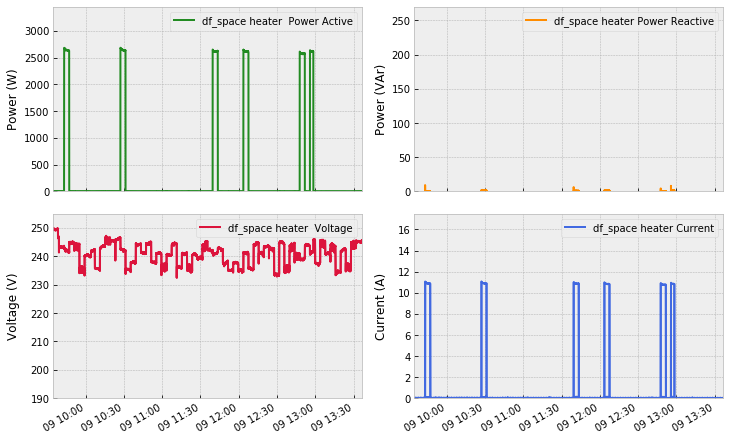

In [156]:


df_sh = next(elec[7].load())#[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sh ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_space heater  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,3450])

df_sh ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_space heater Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sh ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_space heater  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sh ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_space heater Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_estufa.svg', bbox_inches='tight', transparent=True)
pass

### Calentador

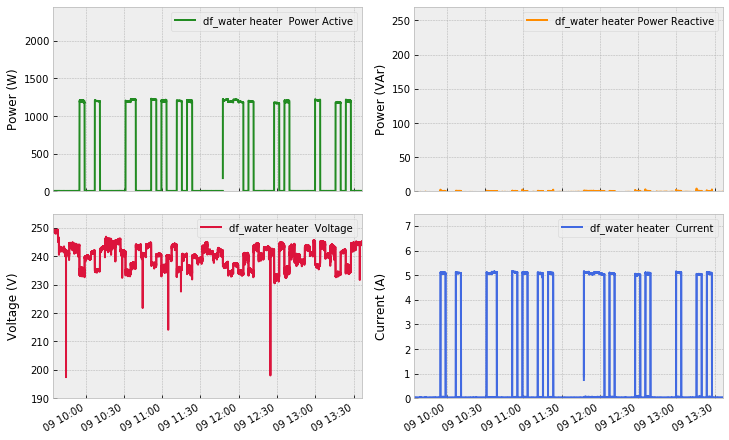

In [157]:


df_sho = next(elec[8].load())#[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sho ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_water heater  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_sho ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_water heater Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sho ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_water heater  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sho ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_water heater  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_calentador.svg', bbox_inches='tight', transparent=True)
pass

### Ventilador

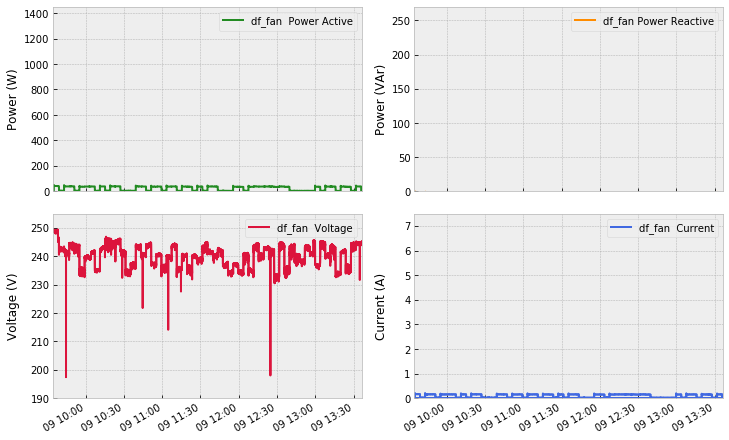

In [158]:


df_fan = next(elec[9].load())#[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fan  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fan Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fan  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fan  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_ventilador.svg', bbox_inches='tight', transparent=True)
pass

### Nevera

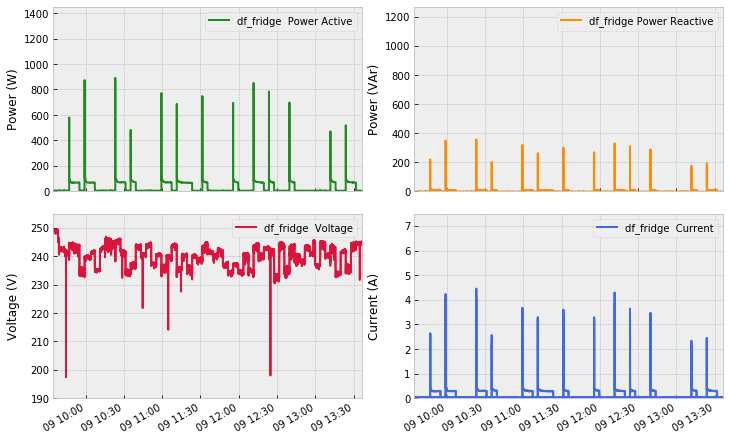

In [159]:



df_fri = next(elec[10].load())#[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fri ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fridge  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fri ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fridge Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_fri ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fridge  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fri ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fridge  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])



ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Congelador

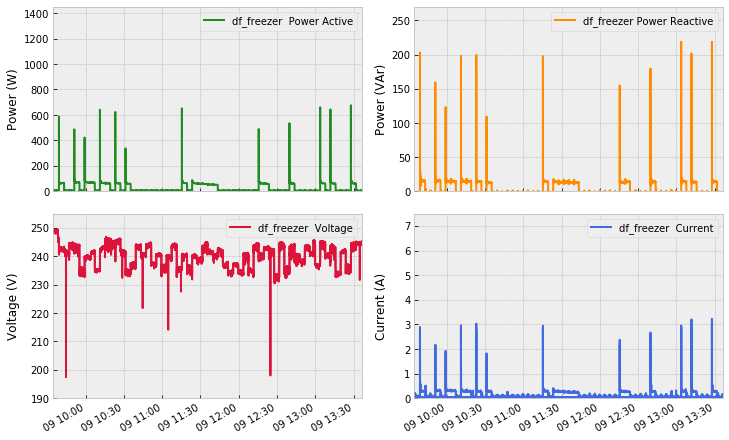

In [160]:


df_fre = next(elec[11].load())#[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fre ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_freezer  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fre ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_freezer Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fre ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_freezer  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fre ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_freezer  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])




ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_congelador.svg', bbox_inches='tight', transparent=True)
pass

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

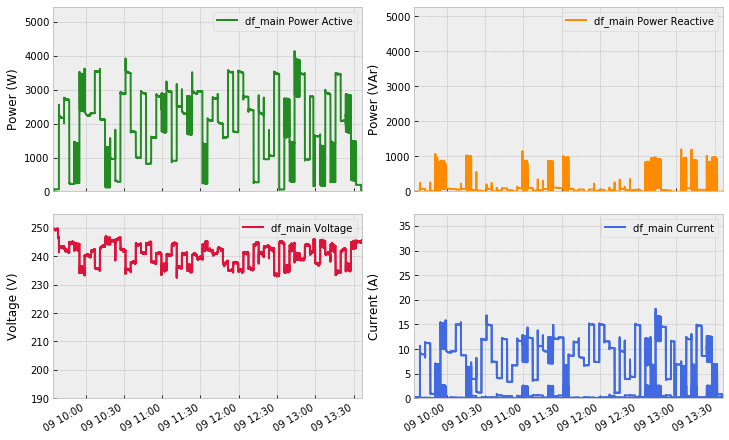

In [161]:


df_main = next(elec[1].load())#[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,5450])

df_main['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,5270])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,37.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_main.svg', bbox_inches='tight', transparent=True)
pass

Por ultimo vemos la grafica de un monitor cuyos resultado arroja tanto potencia activa como reactiva  ( por la fuente conmutada) pero ninguna fluctuacion en la tension ni en en la corriente 

### Trazar los electrodomésticos cuando estén en uso

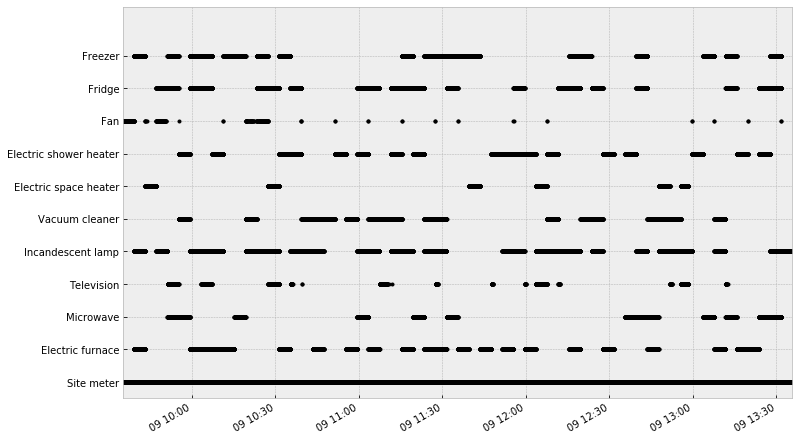

In [162]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

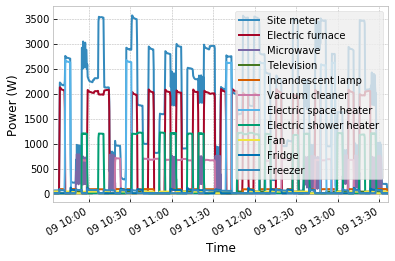

In [17]:
dsualmh.set_window(start='2023-06', end='2023-07')
elec.plot();
plt.xlabel("Time");
#guarda gráfico
plt.savefig('./data/images/datos_submedidos.svg', bbox_inches='tight', transparent=True)
pass

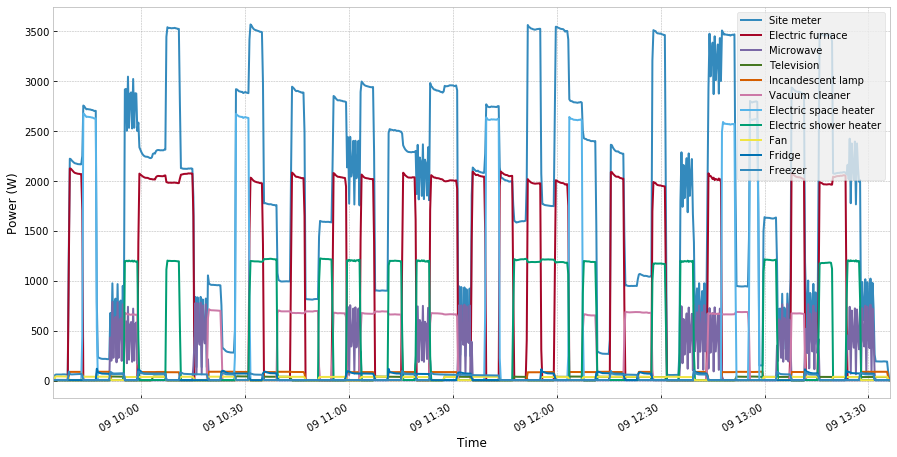

In [18]:
dsualmh.set_window(start='2023-06', end='2023-07')

# Ajusta el tamaño del gráfico con figsize
plt.figure(figsize=(15, 8))

elec.plot()
plt.xlabel("Time")

# Guarda el gráfico
plt.savefig('./data/images/datos_submedidos1.svg', bbox_inches='tight', transparent=True)

# Muestra el gráfico si es necesario
plt.show()

## Gráfico de autocorrelación

In [164]:
from pandas.plotting import autocorrelation_plot

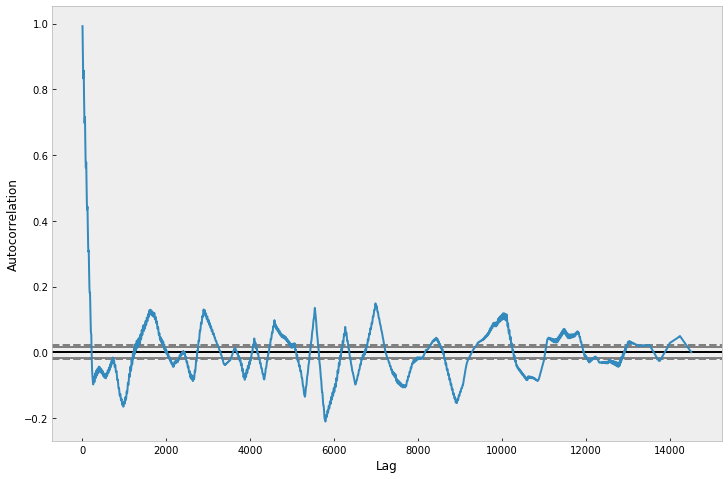

In [165]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [166]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

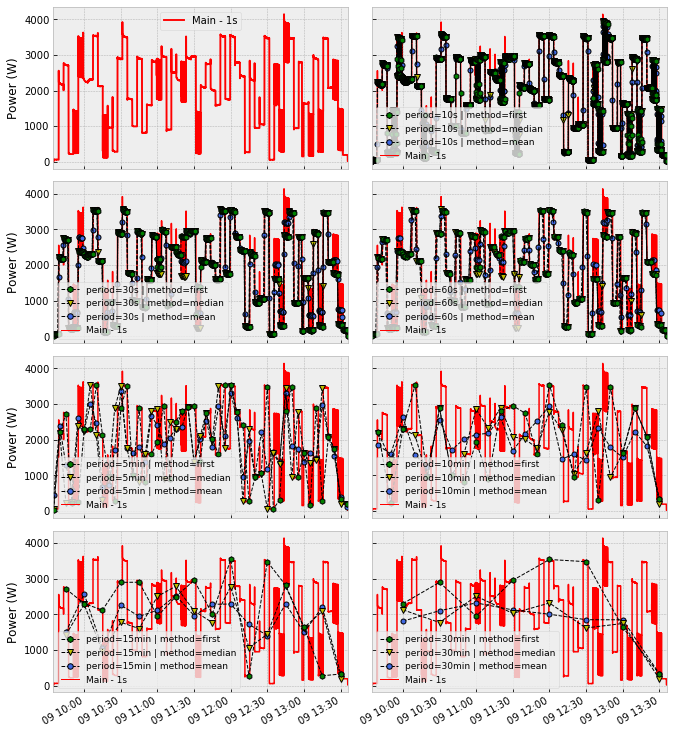

In [167]:
rcParams['figure.figsize'] = (11, 14)


labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s.plot(ax=ax,linewidth=1.9,color='r')
        #df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')


ax1.minorticks_off()


#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [168]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

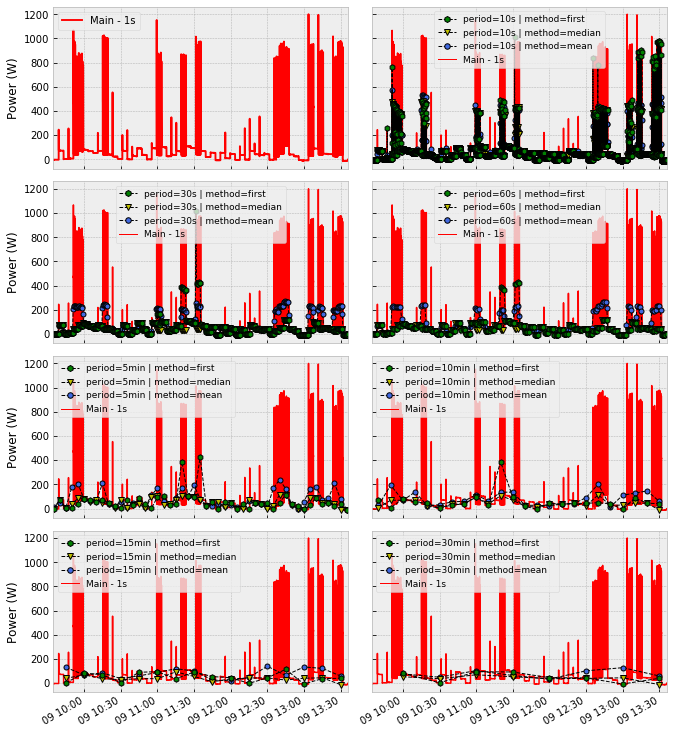

In [169]:
rcParams['figure.figsize'] = (11, 14)



labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        #df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        df_1s.plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    

ax1.minorticks_off()

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass